# TP Aprendizaje Automático 2
- Alsop Agustin
- Hachen Rocio

## Introducción

### Librerias

In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import random

### Funciones

### Carga de datos

In [202]:
data = pd.read_csv('weatherAUS.csv')

In [203]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [204]:
ciudades = list(data['Location'].unique())
len(ciudades)




49

In [205]:
import random
ciudades = list(data['Location'].unique())
ciudades_elegidas = []
for i in range(0,10):
    aleatorio = random.randint(0,48-i)
    ciudades_elegidas.append(ciudades[aleatorio])
    ciudades.pop(aleatorio)
ciudades_elegidas

['Mildura',
 'Nhil',
 'Richmond',
 'Sydney',
 'Darwin',
 'AliceSprings',
 'Tuggeranong',
 'PerthAirport',
 'GoldCoast',
 'Wollongong']

In [206]:
df = data[data['Location'].isin(ciudades_elegidas)]
df['Location'].unique()

array(['Richmond', 'Sydney', 'Wollongong', 'Tuggeranong', 'Mildura',
       'Nhil', 'GoldCoast', 'PerthAirport', 'AliceSprings', 'Darwin'],
      dtype=object)

In [207]:
print(df.columns)
print(df.dtypes)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


## Ejercicio 1

### Codificación de Variables

In [208]:
df['RainToday'] = df['RainToday'].astype('category')
df['RainTomorrow'] = df['RainTomorrow'].astype('category')
df['WindGustDir'] = df['WindGustDir'].astype('category')
df['WindDir9am'] = df['WindDir9am'].astype('category')
df['WindDir3pm'] = df['WindDir3pm'].astype('category')

C:\Users\alsop\AppData\Local\Temp\ipykernel_11116\1444240750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'] = df['RainToday'].astype('category')
C:\Users\alsop\AppData\Local\Temp\ipykernel_11116\1444240750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'] = df['RainTomorrow'].astype('category')
C:\Users\alsop\AppData\Local\Temp\ipykernel_11116\1444240750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### Análisis y decisión sobre datos faltantes.




In [209]:
# Nulls por Variable
nulls = df.isna().sum()
print(nulls)

print(f' Valores null totales: {nulls.sum()}')

Date                 0
Location             0
MinTemp             50
MaxTemp             47
Rainfall           243
Evaporation      12520
Sunshine         14384
WindGustDir       1464
WindGustSpeed     1458
WindDir9am        2184
WindDir3pm         293
WindSpeed9am       177
WindSpeed3pm       153
Humidity9am        149
Humidity3pm        145
Pressure9am        129
Pressure3pm         98
Cloud9am         12745
Cloud3pm         12786
Temp9am            101
Temp3pm            100
RainToday          243
RainTomorrow       244
dtype: int64
 Valores null totales: 59713


### Tratamiento de los valores nulos
1) Las filas que tengan Nulls en la columna de la variable a predecir se descartán

2) Las filas que tengan al menos un 50% de Nulls se borrarán, ya que consideramos que rellenarlo por imputación resultaría en un dato creado artificialmente. Verificamos que al hacer esto no se borrara una gran cantidad de información.

3) Para el resto de los datos Null, y luego de haber hecho la validación cruzada, se realizarán imputaciones dependiendo de su distribución y tipo de variable.
    - Asimetría -> Mediana
    - Normal -> Media
    - Bimodal y Categorica -> KNN

#### Paso 1

In [210]:
# Eliminación de las row donde la variable de salida sea null
df = df.dropna(subset=['RainTomorrow'])
print(df['RainTomorrow'].isna().sum())

0


In [211]:
# Guardamos la cantidad total de filas para luego compararlas
con_null = df.shape[0]

#### Paso 2

In [212]:
# Nos quedamos solo con aquellas rows con al menos 7 variables no Null
df = df.dropna(thresh=13)
df.isna().sum()

Date                 0
Location             0
MinTemp             21
MaxTemp             12
Rainfall           162
Evaporation      12282
Sunshine         14110
WindGustDir       1304
WindGustSpeed     1298
WindDir9am        2088
WindDir3pm         247
WindSpeed9am       114
WindSpeed3pm       109
Humidity9am         85
Humidity3pm         99
Pressure9am         82
Pressure3pm         71
Cloud9am         12504
Cloud3pm         12539
Temp9am             41
Temp3pm             56
RainToday          162
RainTomorrow         0
dtype: int64

In [213]:
sin_null = df.shape[0] # Cantidad de filas restantes luego de la eliminación de Nulls
print(f'Cantidad de filas en el dataset previo al paso 2: {con_null}\nCantidad de filas en el dataset luego de quitar nulls: {sin_null}\nFilas perdidas: {con_null - sin_null}\nPorcentaje de filas perdidas: {round((con_null-sin_null)*100/con_null,2)}%')

Cantidad de filas en el dataset previo al paso 2: 29057
Cantidad de filas en el dataset luego de quitar nulls: 29019
Filas perdidas: 38
Porcentaje de filas perdidas: 0.13%


Debido a que el porcentajes de filas quitadas del data set representa un porcentaje minimo del total consideramos válida la operación

### Validación Cruzada

In [214]:
# Division train - test
x = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']

ratio_train = 0.8
ratio_test = 0.20

# Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y.values.reshape(-1,1), test_size=ratio_test, random_state=42) # se utiliza 42 para garantizar que cada vez que se corra el código se obtengan los mismos resultados

print(f'Cantidad de datos luego de la separación')
print(f'Train: {x_train.shape[0]} - 80%\n Test: {x_test.shape[0]} - 20%')

Cantidad de datos luego de la separación
Train: 23215 - 80%
 Test: 5804 - 20%


### Análisis descriptivo

In [215]:
print(x_train.describe(include='all'))

              Date Location       MinTemp       MaxTemp      Rainfall  \
count        23215    23215  23197.000000  23205.000000  23095.000000   
unique        3308       10           NaN           NaN           NaN   
top     2013-11-04   Sydney           NaN           NaN           NaN   
freq            10     2681           NaN           NaN           NaN   
mean           NaN      NaN     13.751058     25.165326      2.577653   
std            NaN      NaN      6.891983      6.756195      9.903855   
min            NaN      NaN     -8.200000      4.100000      0.000000   
25%            NaN      NaN      8.900000     20.000000      0.000000   
50%            NaN      NaN     14.000000     24.700000      0.000000   
75%            NaN      NaN     19.000000     30.500000      0.400000   
max            NaN      NaN     31.900000     47.000000    367.600000   

         Evaporation      Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
count   13362.000000  11914.000000       2

#### Matriz de Correlación

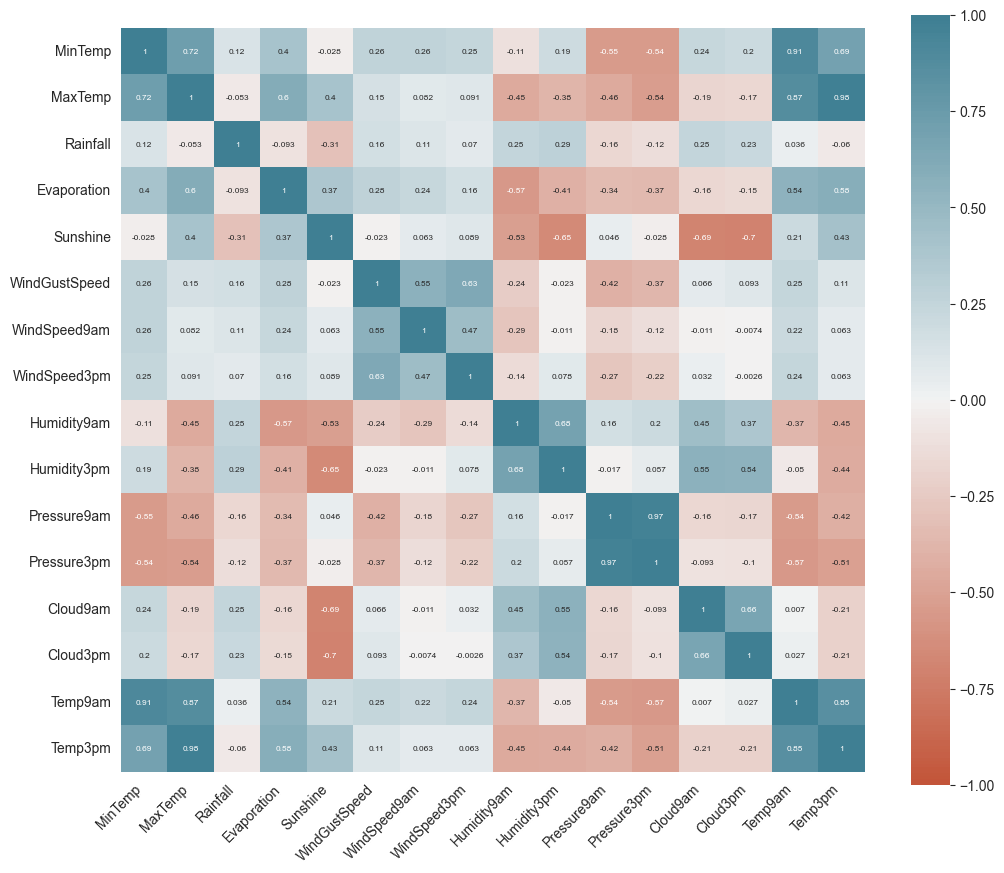

In [216]:
x_train_corr=pd.DataFrame(x_train,columns=x_train.drop(columns=['RainToday', 'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']).columns)

plt.figure(figsize=(12,10))
corr = x_train_corr.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

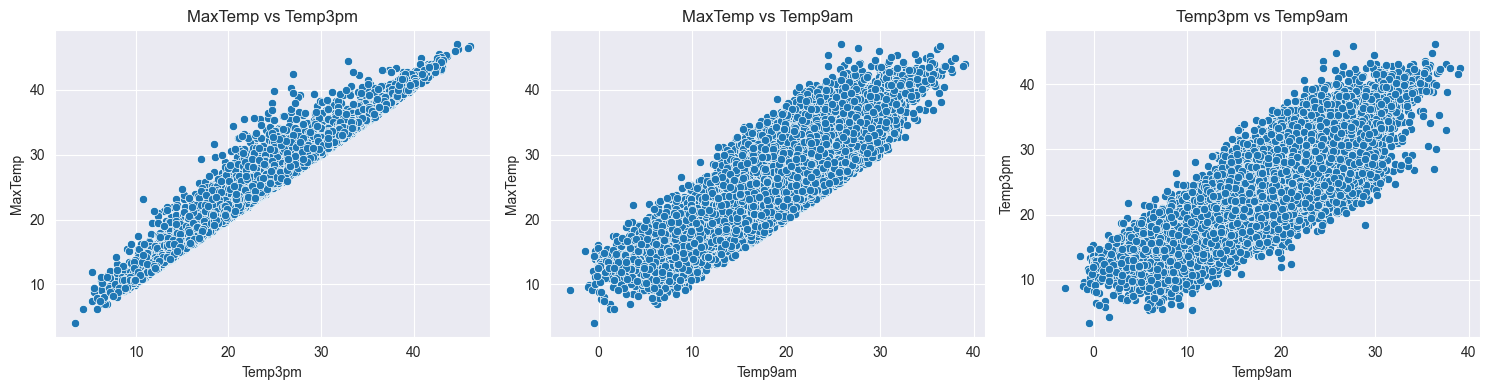

In [217]:
# Visualización de la relación entre algunas variables

pares = [('MaxTemp', 'Temp3pm'), ('MaxTemp', 'Temp9am'), ('Temp3pm', 'Temp9am')]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (var1, var2) in enumerate(pares):
    sns.scatterplot(x=x_train_corr[var2], y=x_train_corr[var1], ax=axes[i])
    axes[i].set_title(f'{var1} vs {var2}')
    axes[i].set_xlabel(var2)
    axes[i].set_ylabel(var1)

plt.tight_layout()
plt.show()

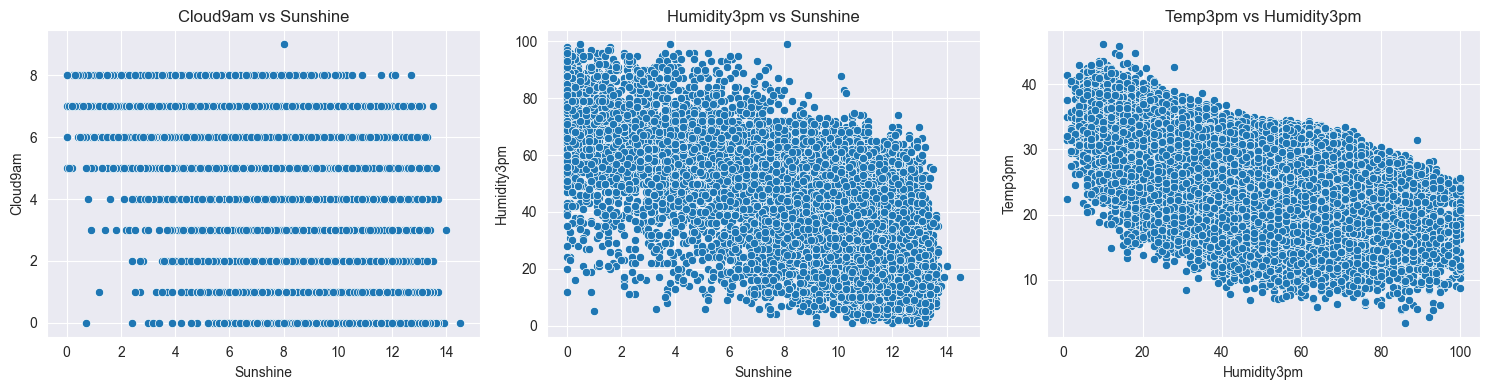

In [218]:
# Visualización de la relación entre algunas variables

pares = [('Cloud9am', 'Sunshine'), ('Humidity3pm', 'Sunshine'), ('Temp3pm', 'Humidity3pm')]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (var1, var2) in enumerate(pares):
    sns.scatterplot(x=x_train_corr[var2], y=x_train_corr[var1], ax=axes[i])
    axes[i].set_title(f'{var1} vs {var2}')
    axes[i].set_xlabel(var2)
    axes[i].set_ylabel(var1)

plt.tight_layout()
plt.show()

#### Analisis por variable individual

Para poder hacer un mejor análisis sobre los datos (presencia de outliers, distribución de los datos, etc.) decidimos graficar la distribución de cada variable. Además, incluímos la variable categórica en cada uno de los gráficos para poder apreciar mejor si los outliers realmente eran valores atípicos, o si se justificaban por su categoría.

MinTemp
count    23197.000000
mean        13.751058
std          6.891983
min         -8.200000
25%          8.900000
50%         14.000000
75%         19.000000
max         31.900000
Name: MinTemp, dtype: float64 

RainToday


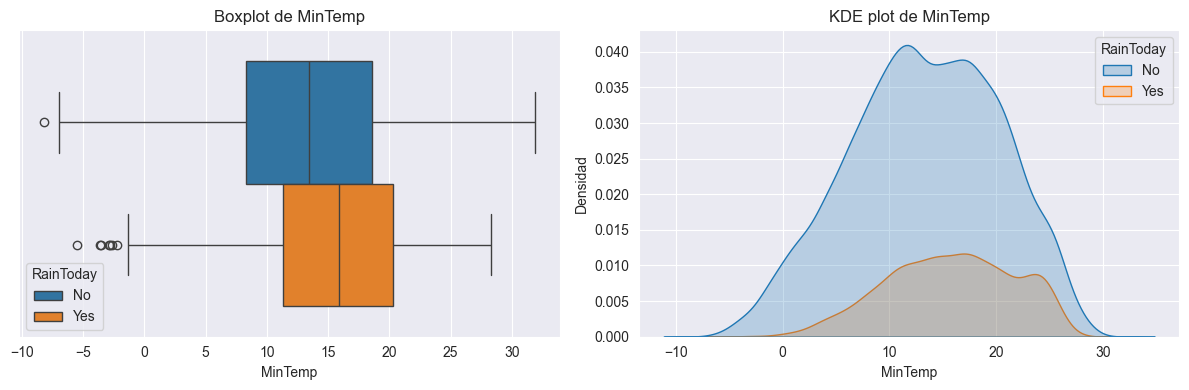

WindGustDir


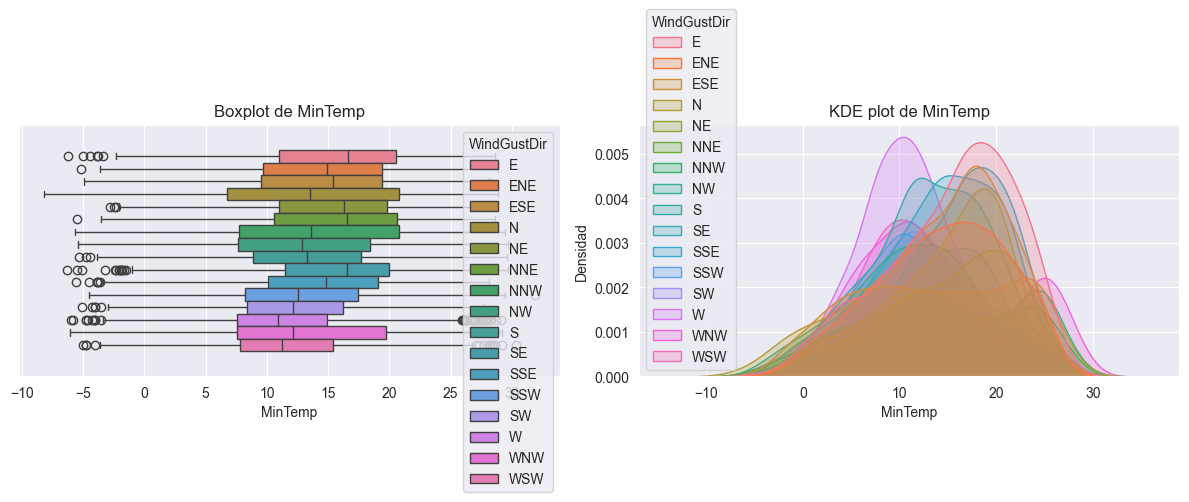

WindDir9am


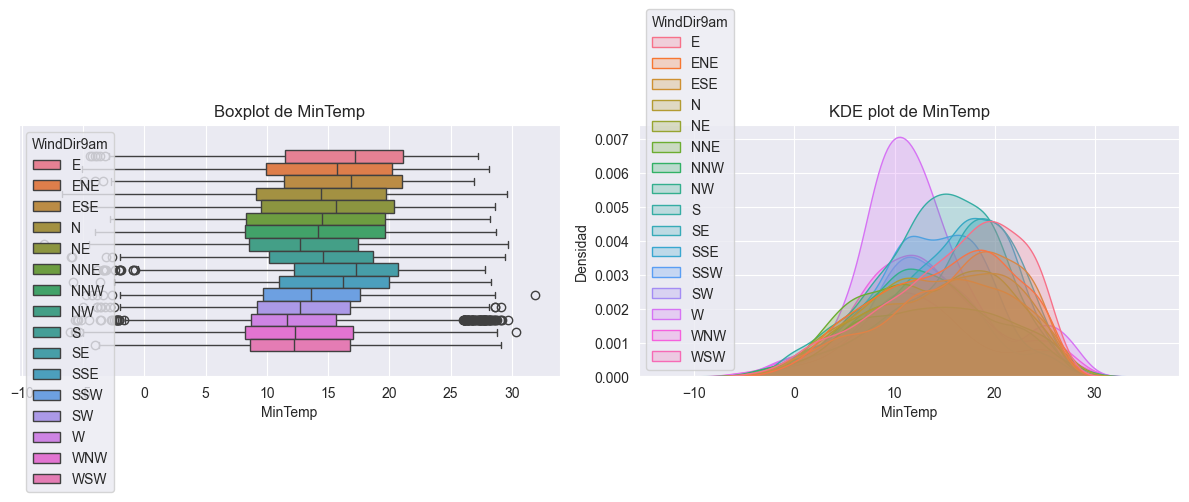

WindDir3pm


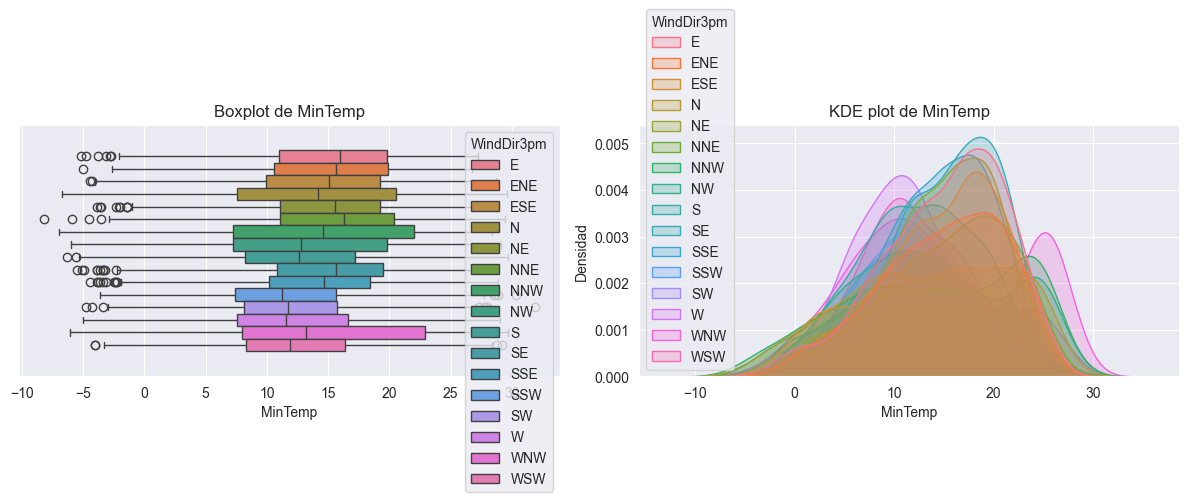

#############################################################################################
MaxTemp
count    23205.000000
mean        25.165326
std          6.756195
min          4.100000
25%         20.000000
50%         24.700000
75%         30.500000
max         47.000000
Name: MaxTemp, dtype: float64 

RainToday


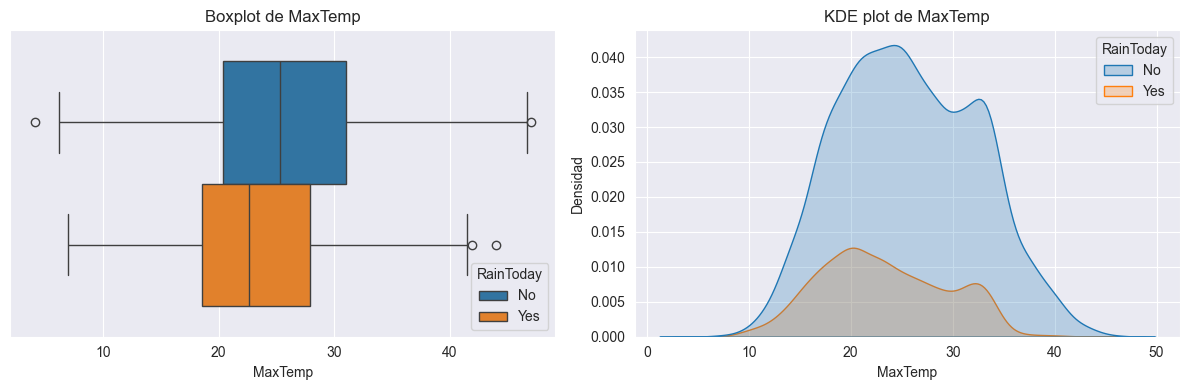

WindGustDir


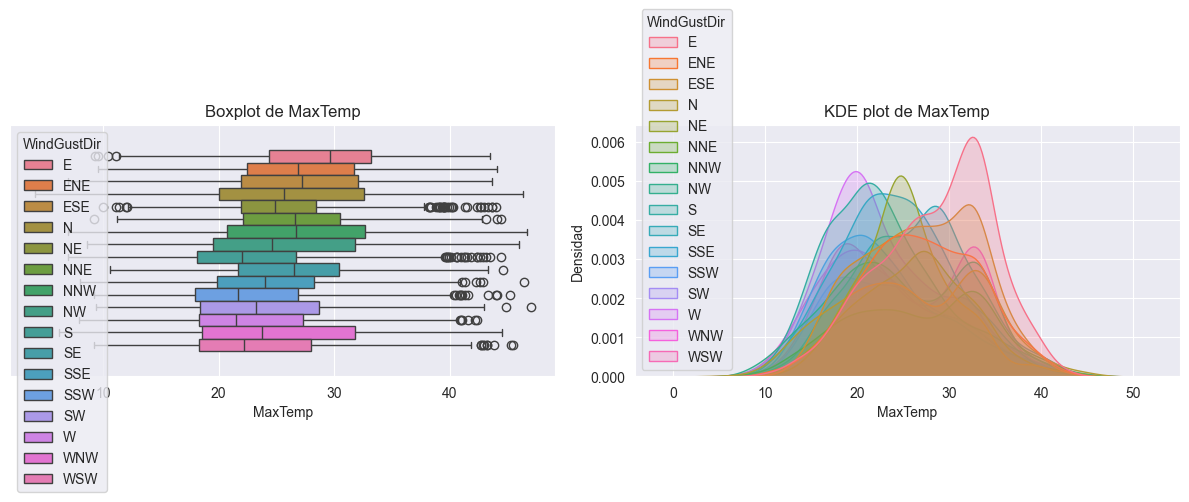

WindDir9am


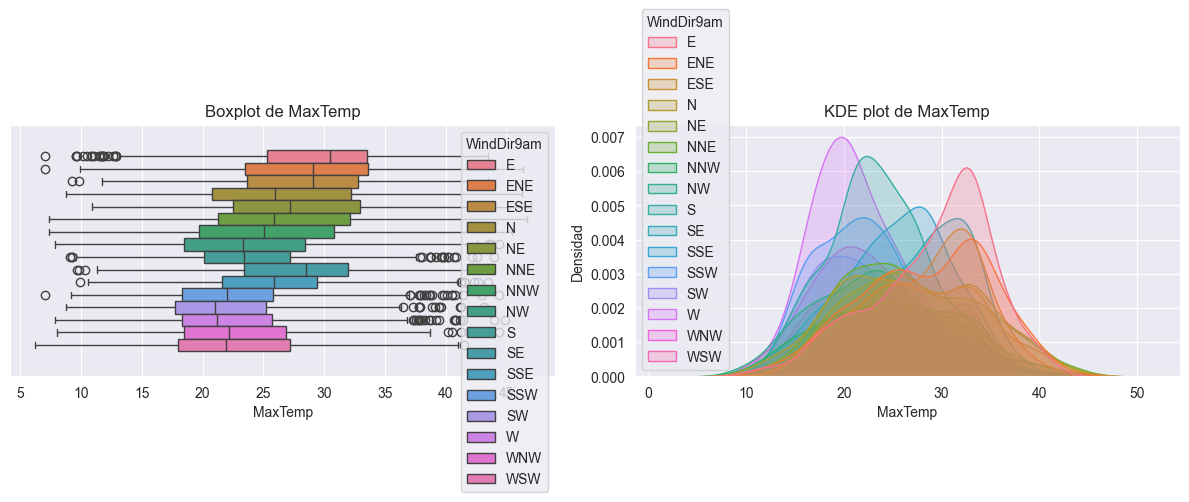

WindDir3pm


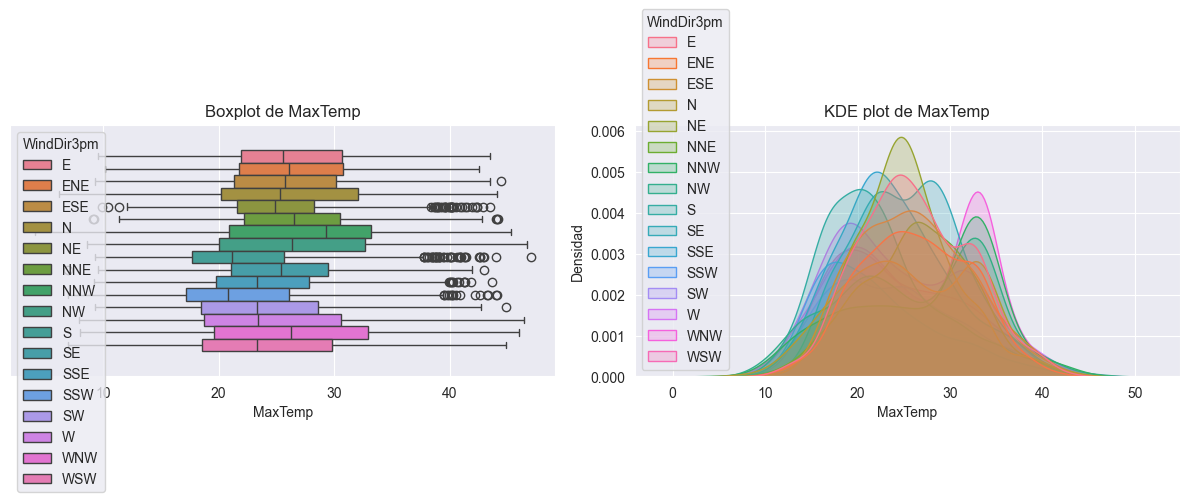

#############################################################################################
Rainfall
count    23095.000000
mean         2.577653
std          9.903855
min          0.000000
25%          0.000000
50%          0.000000
75%          0.400000
max        367.600000
Name: Rainfall, dtype: float64 

RainToday


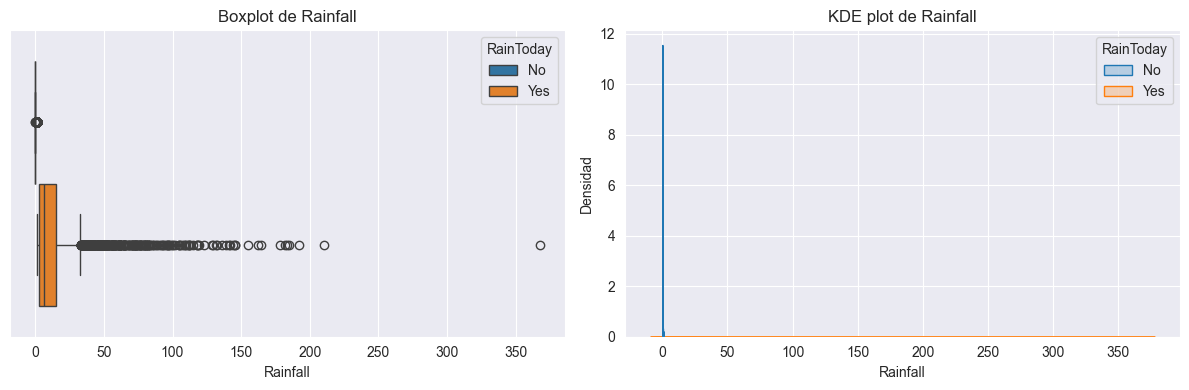

WindGustDir


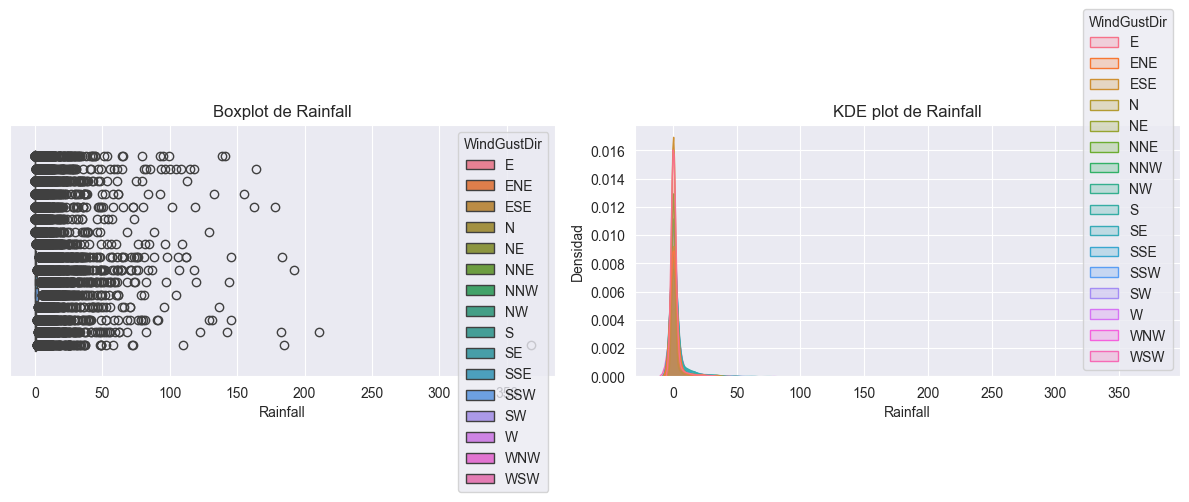

WindDir9am


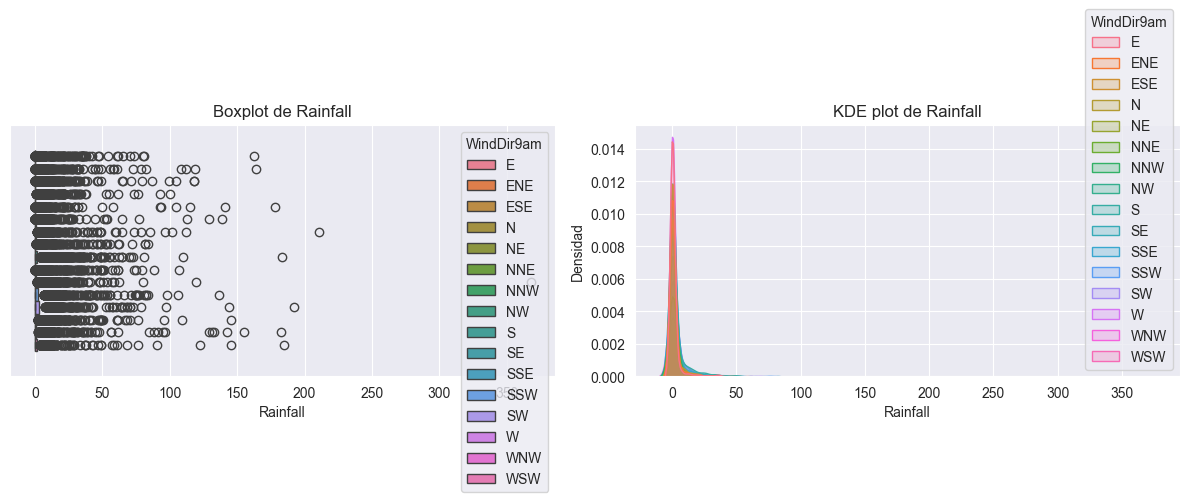

WindDir3pm


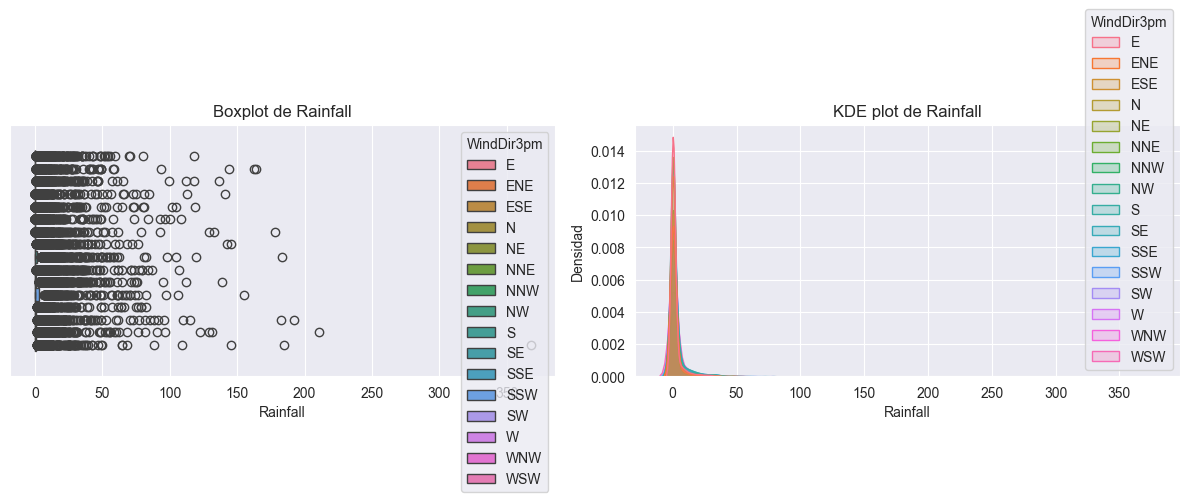

#############################################################################################
Evaporation
count    13362.000000
mean         6.257903
std          3.966573
min          0.000000
25%          3.400000
50%          5.800000
75%          8.000000
max         50.200000
Name: Evaporation, dtype: float64 

RainToday


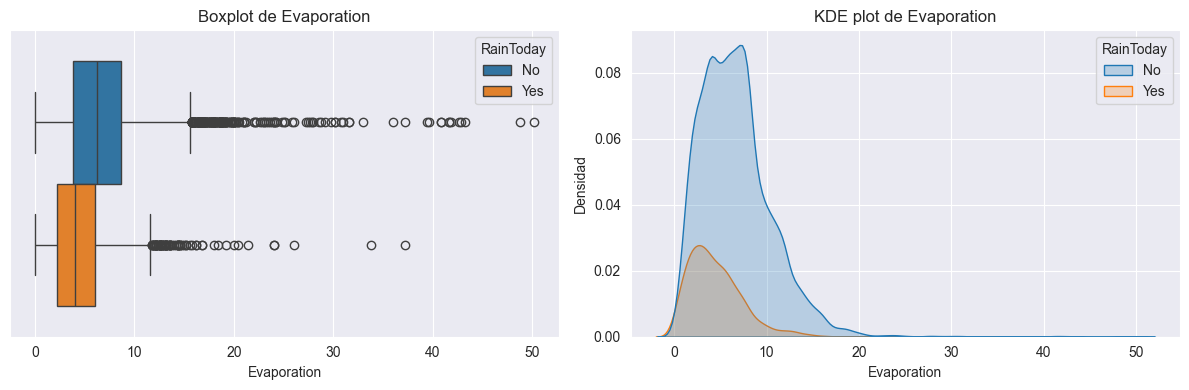

WindGustDir


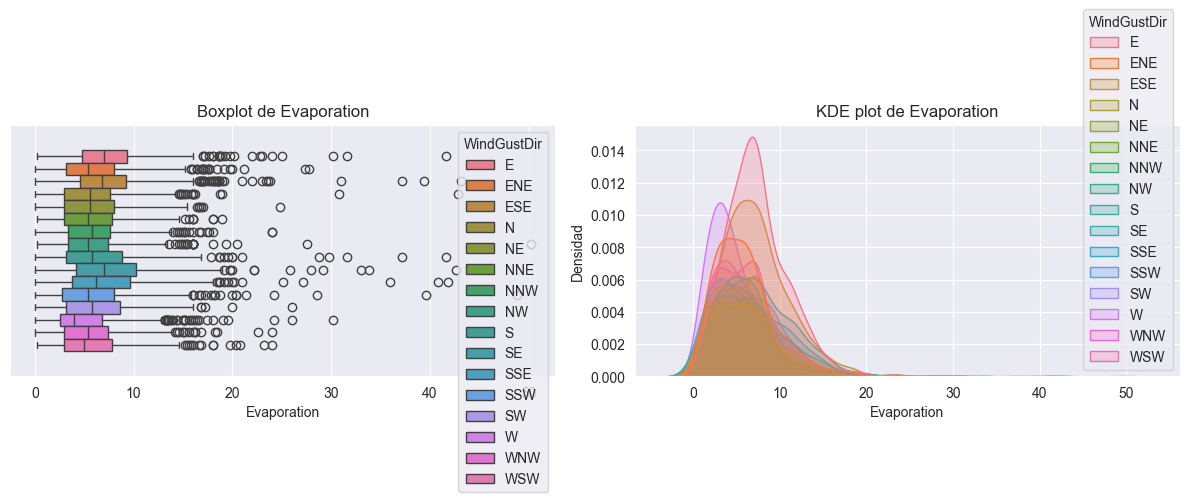

WindDir9am


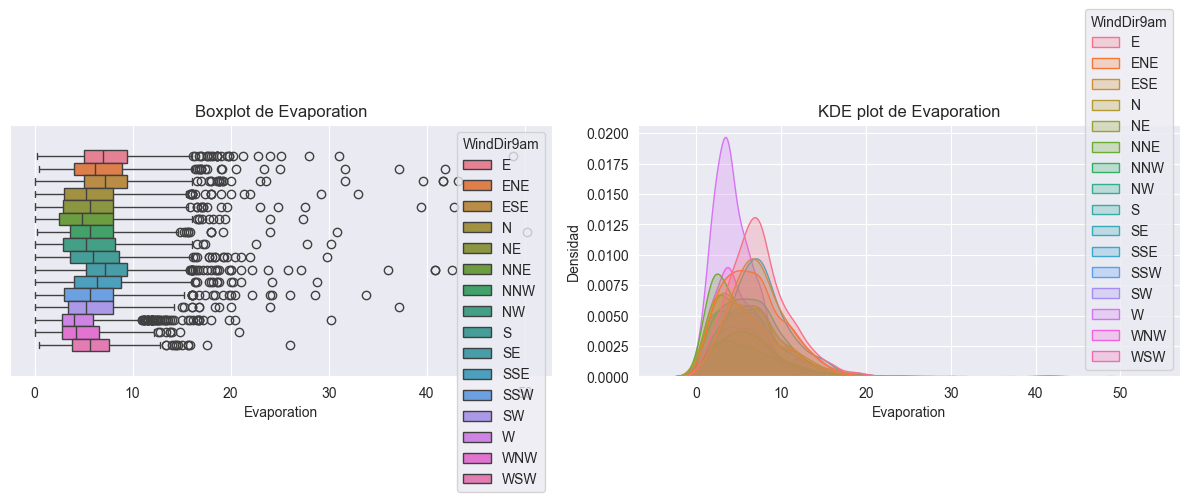

WindDir3pm


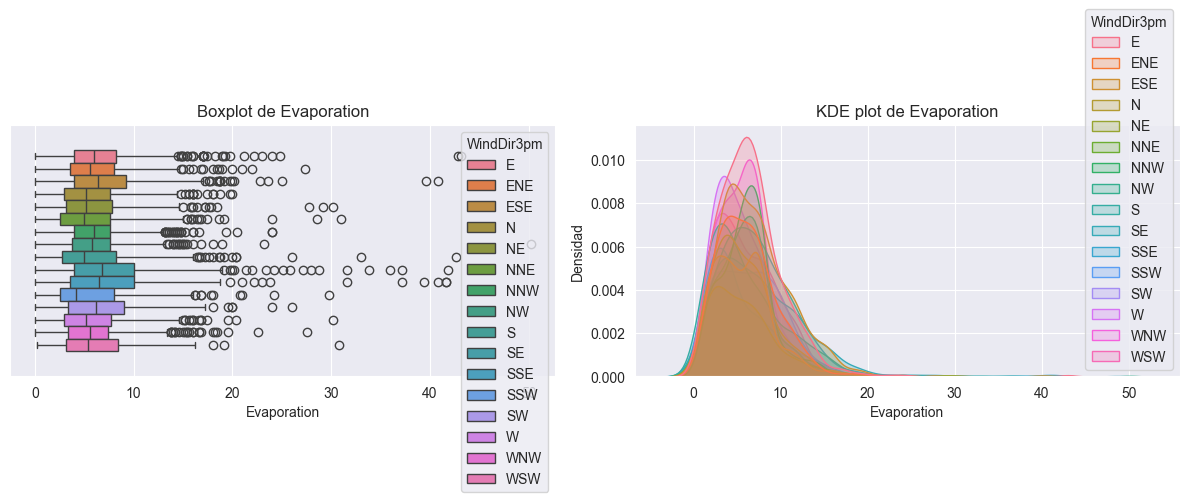

#############################################################################################
Sunshine
count    11914.000000
mean         8.436545
std          3.563975
min          0.000000
25%          6.400000
50%          9.600000
75%         11.000000
max         14.500000
Name: Sunshine, dtype: float64 

RainToday


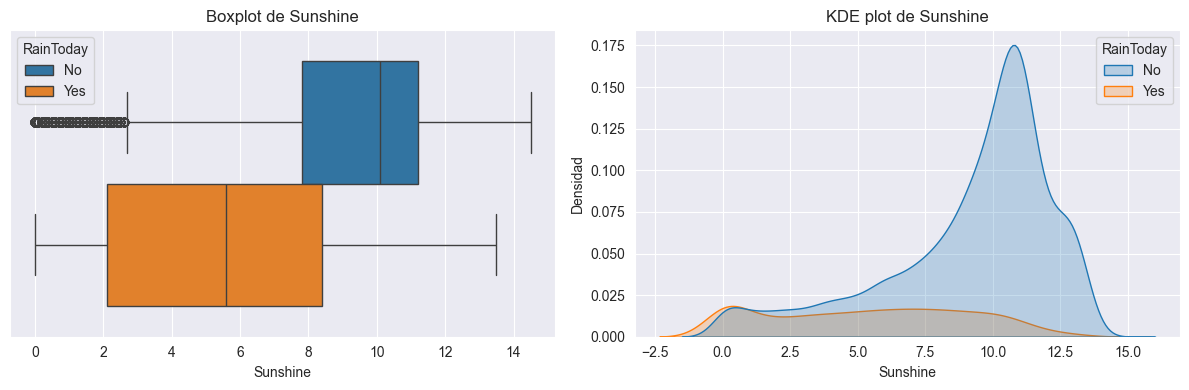

WindGustDir


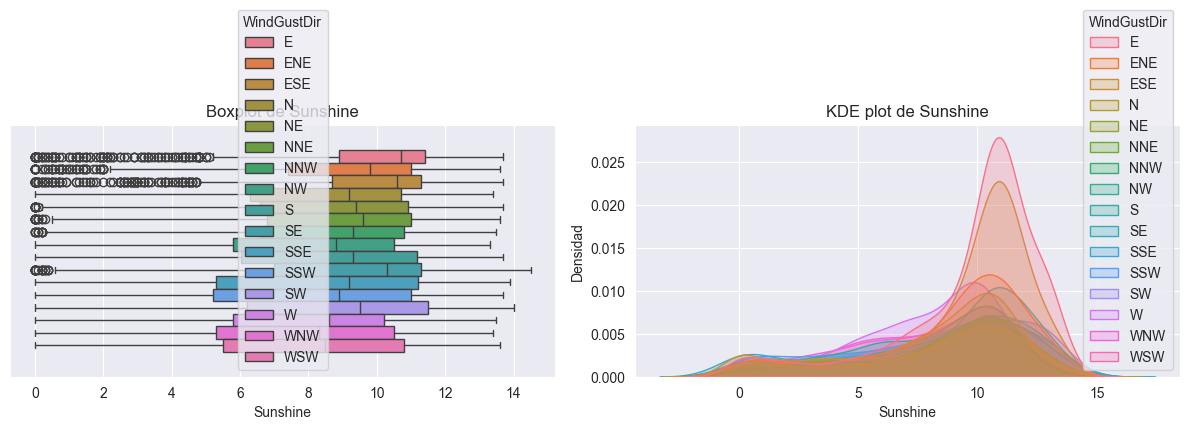

WindDir9am


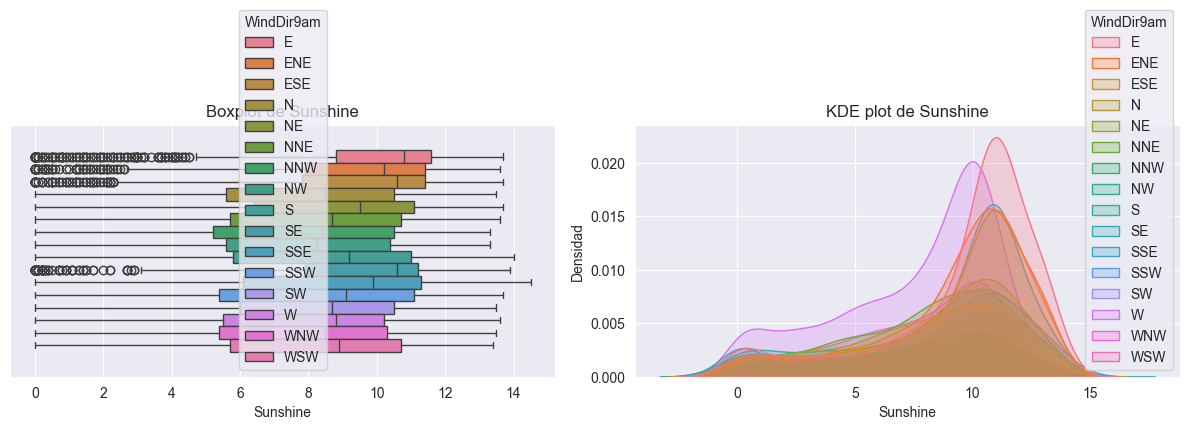

WindDir3pm


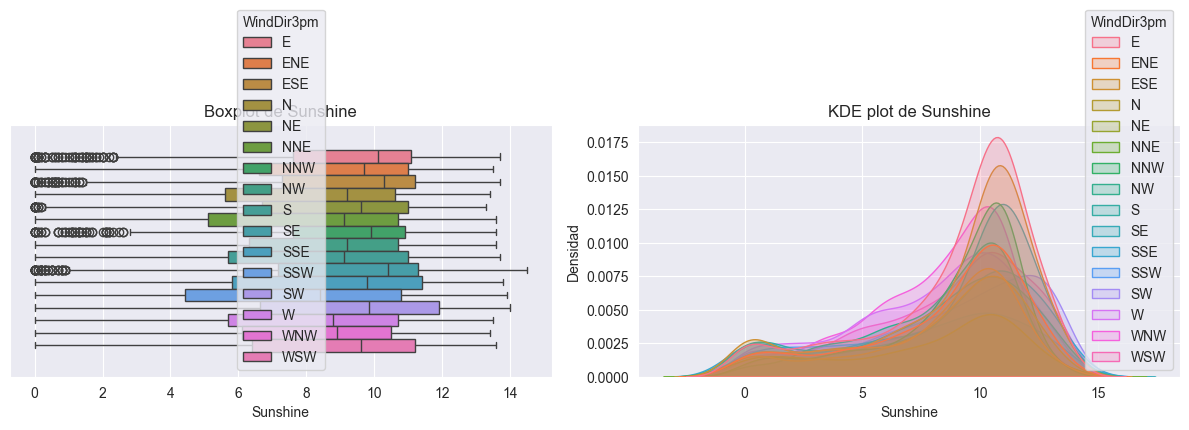

#############################################################################################
#############################################################################################
WindGustSpeed
count    22174.000000
mean        40.464147
std         13.019760
min          9.000000
25%         31.000000
50%         39.000000
75%         48.000000
max        126.000000
Name: WindGustSpeed, dtype: float64 

RainToday


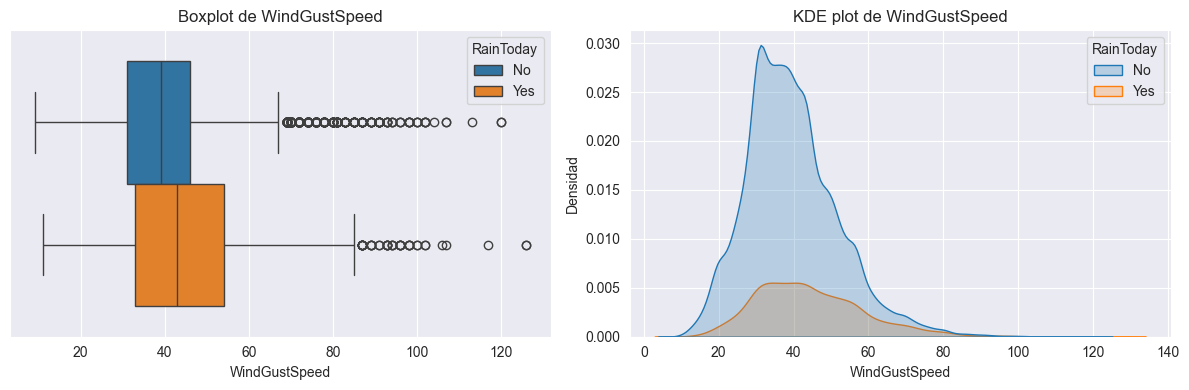

WindGustDir


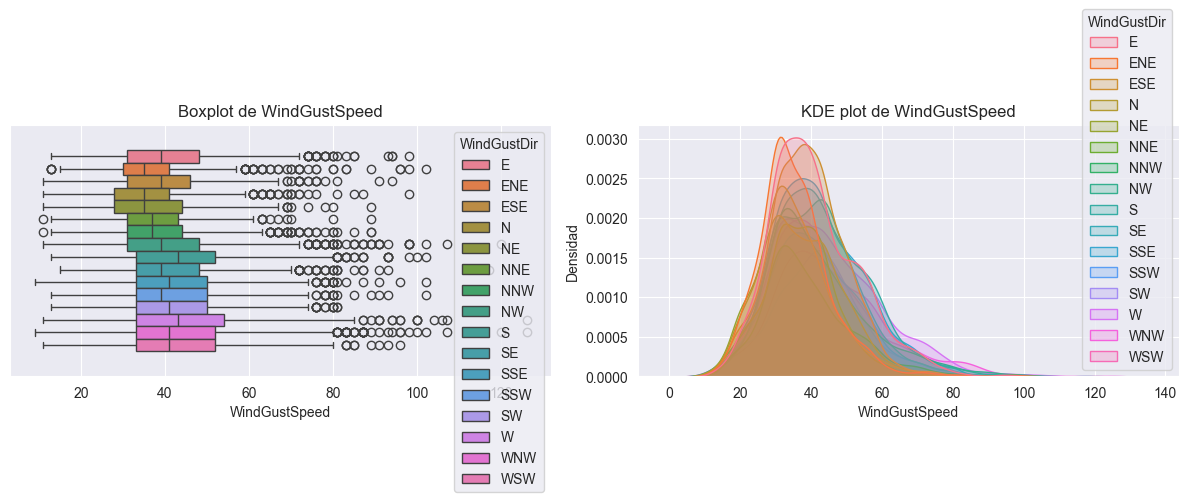

WindDir9am


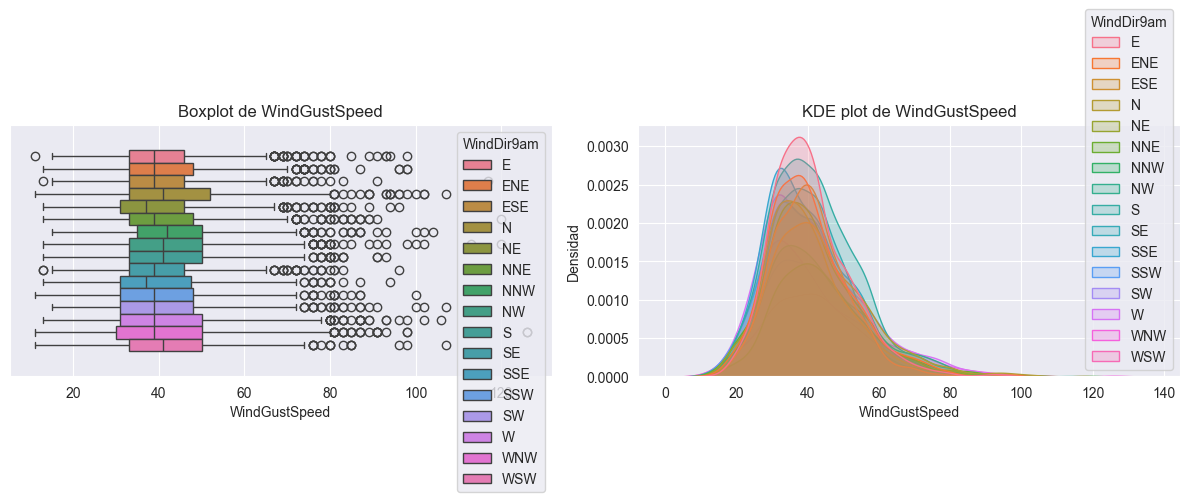

WindDir3pm


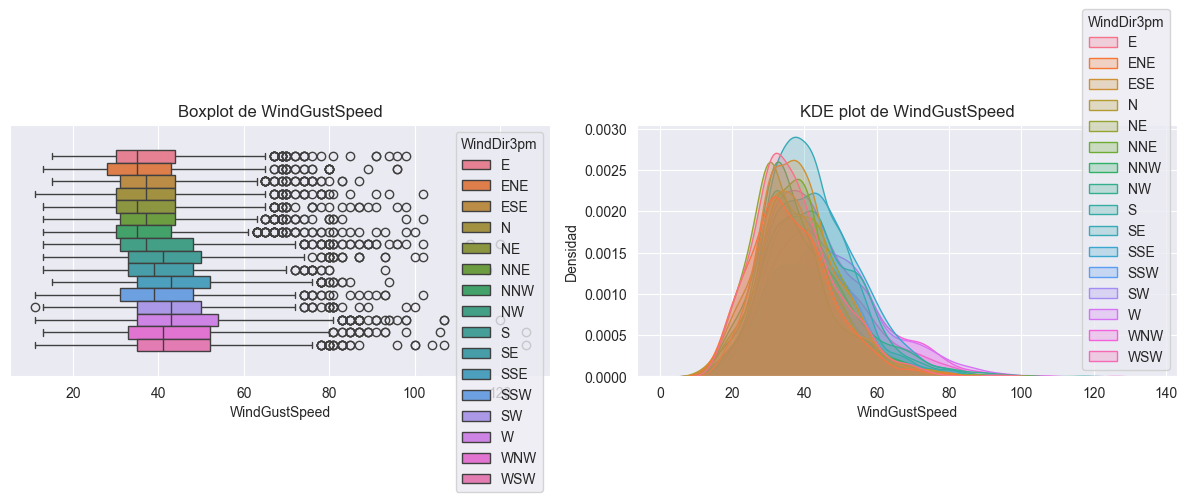

#############################################################################################
#############################################################################################
#############################################################################################
WindSpeed9am
count    23125.000000
mean        14.289124
std          8.832360
min          0.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         87.000000
Name: WindSpeed9am, dtype: float64 

RainToday


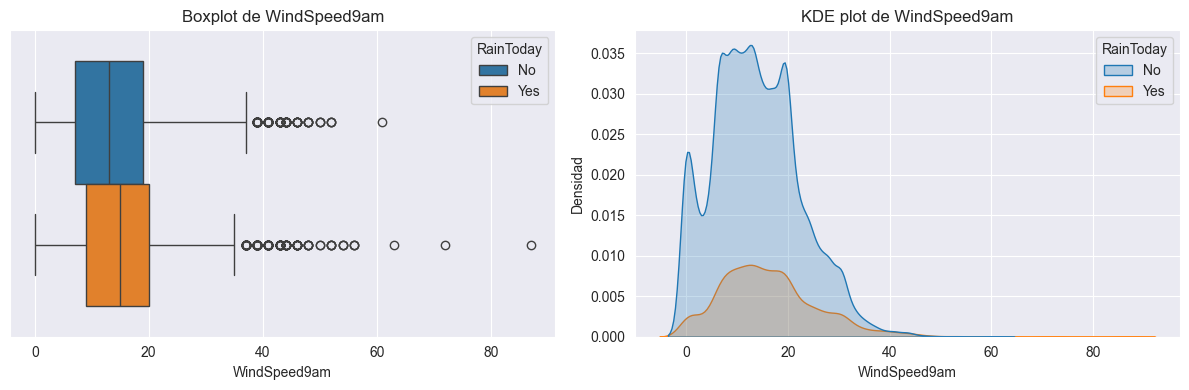

WindGustDir


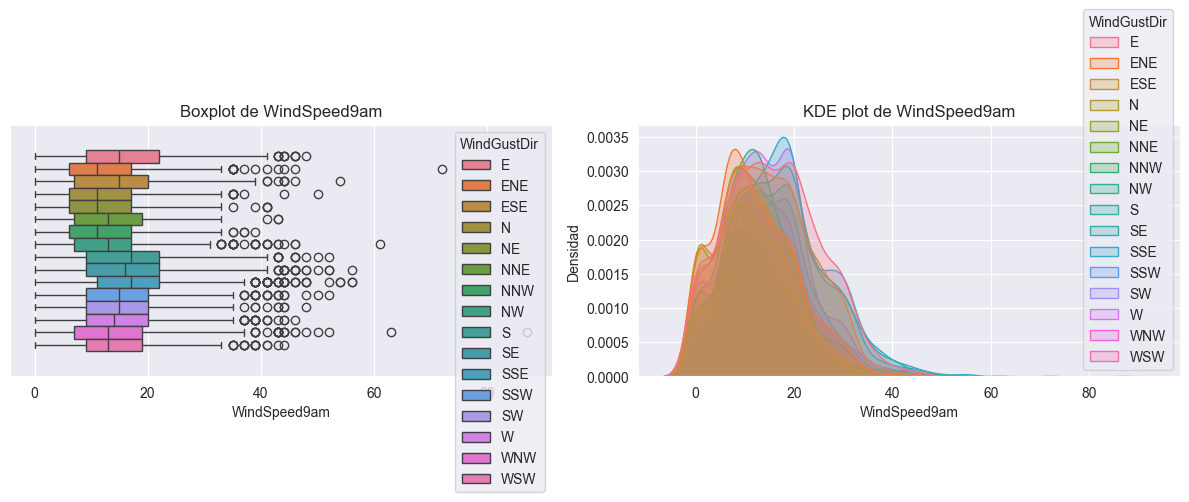

WindDir9am


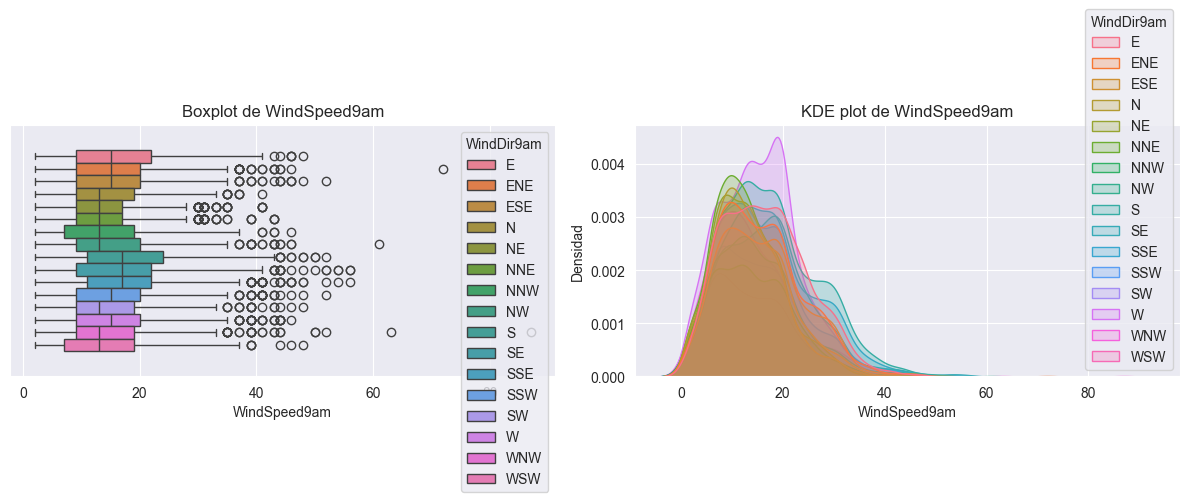

WindDir3pm


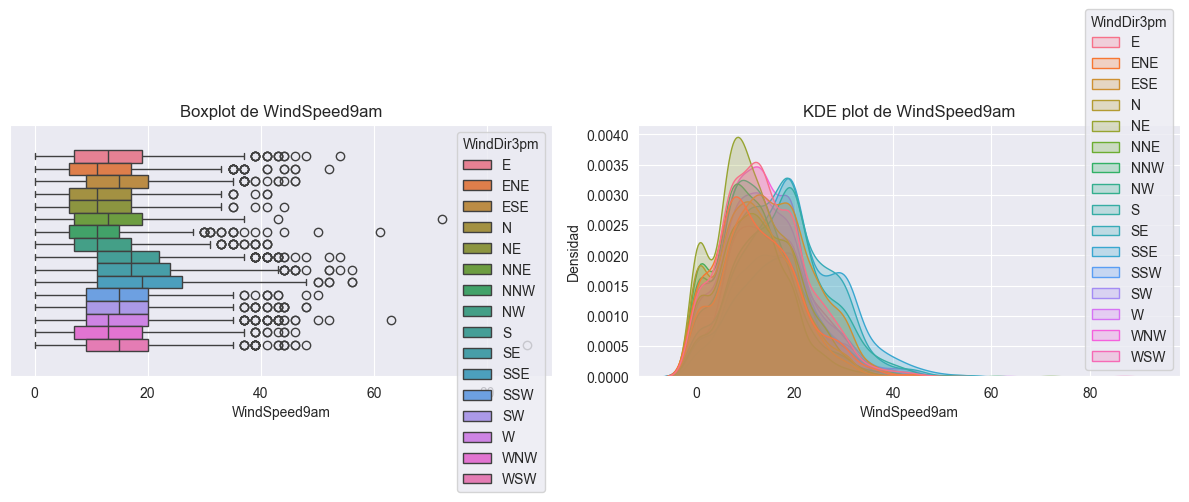

#############################################################################################
WindSpeed3pm
count    23128.000000
mean        19.453347
std          8.567718
min          0.000000
25%         13.000000
50%         19.000000
75%         24.000000
max         87.000000
Name: WindSpeed3pm, dtype: float64 

RainToday


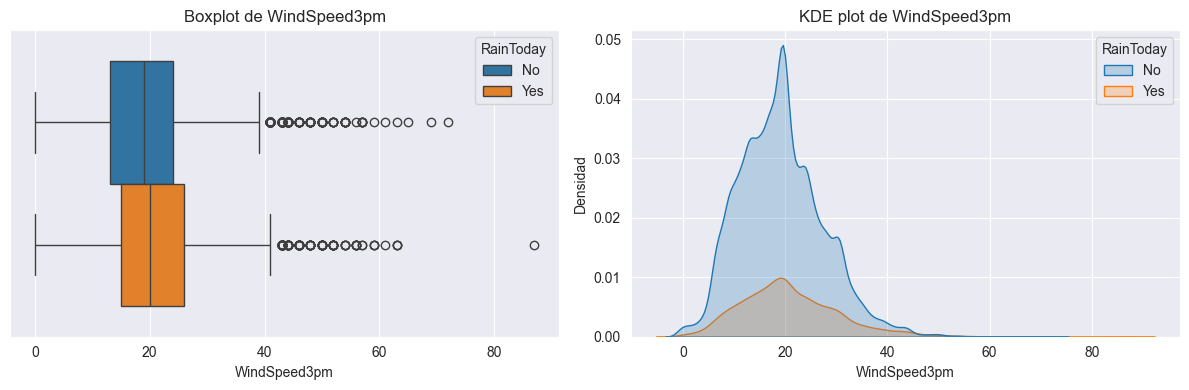

WindGustDir


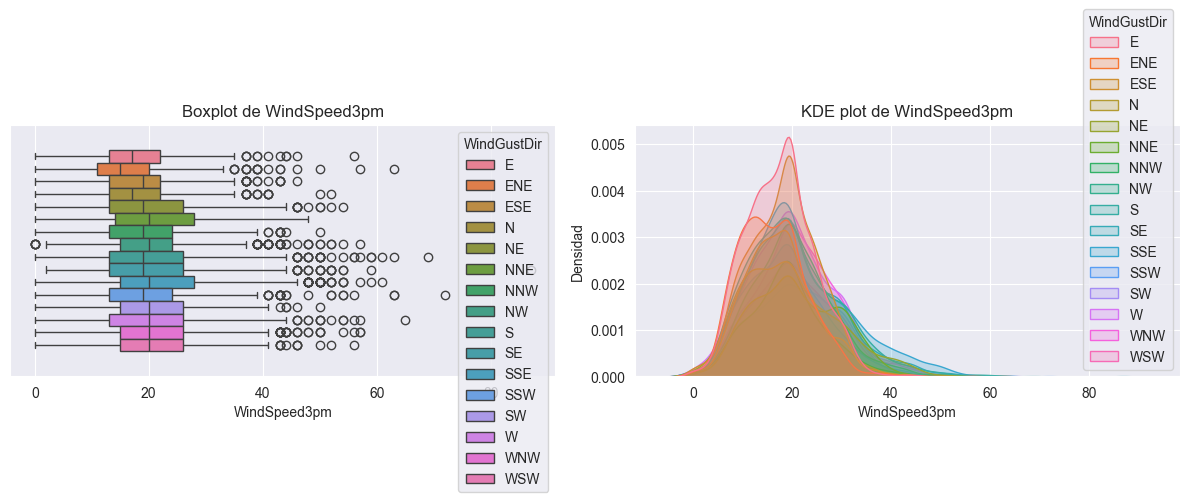

WindDir9am


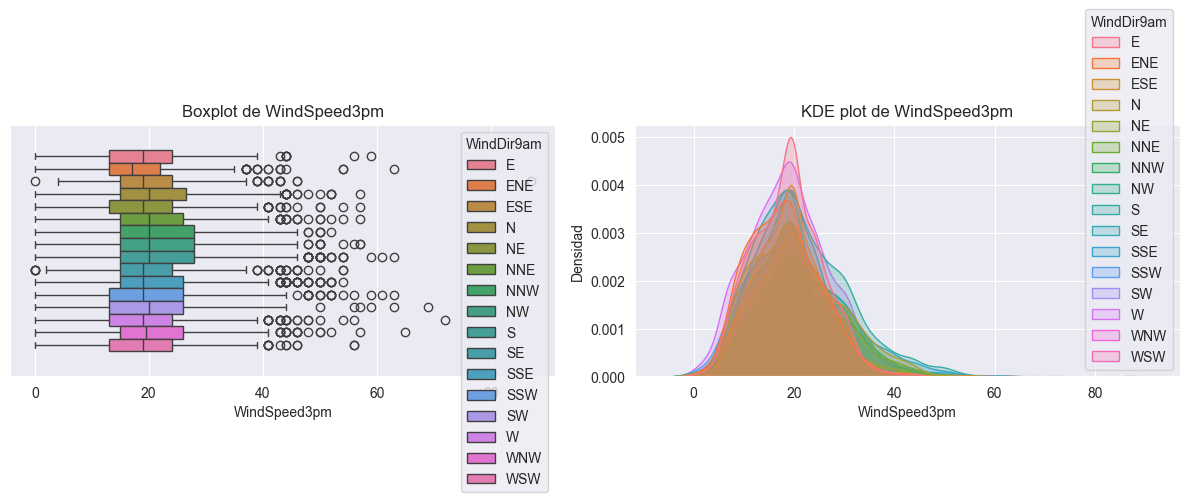

WindDir3pm


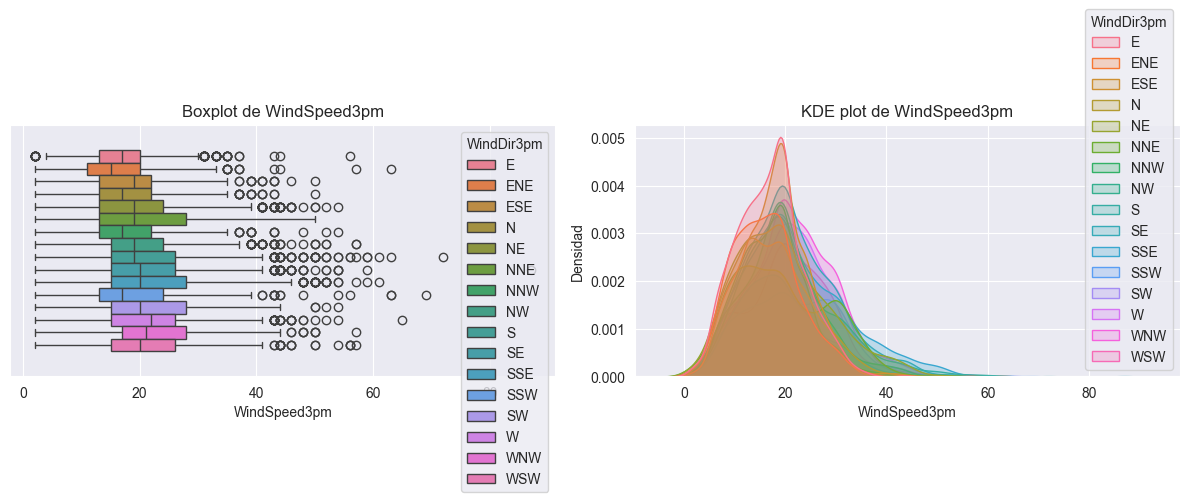

#############################################################################################
Humidity9am
count    23150.000000
mean        65.154946
std         20.165619
min          1.000000
25%         53.000000
50%         67.000000
75%         80.000000
max        100.000000
Name: Humidity9am, dtype: float64 

RainToday


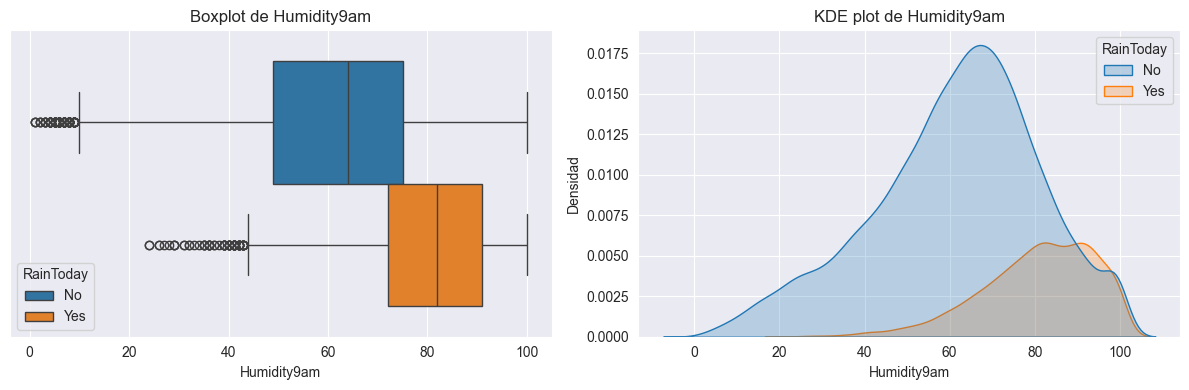

WindGustDir


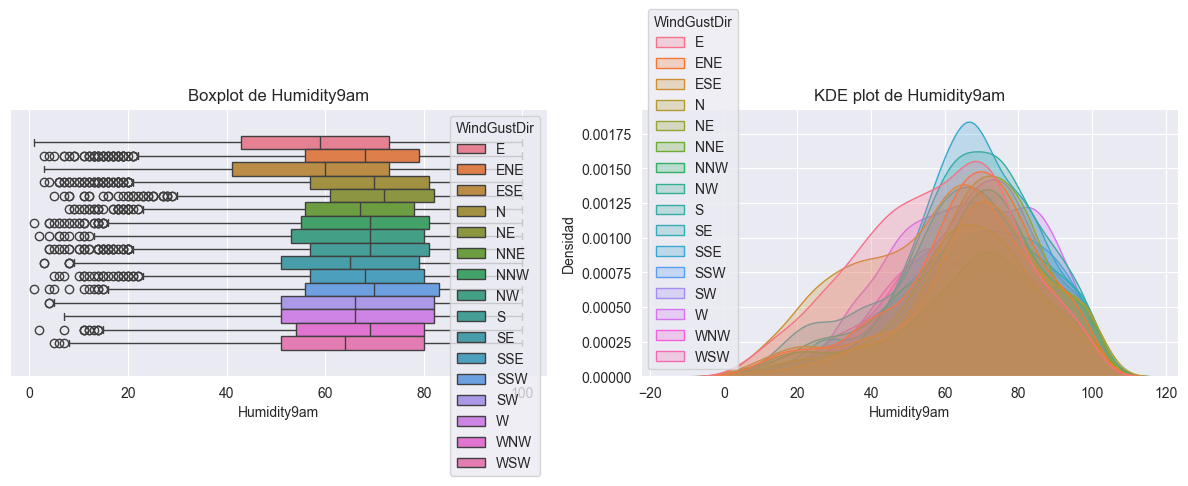

WindDir9am


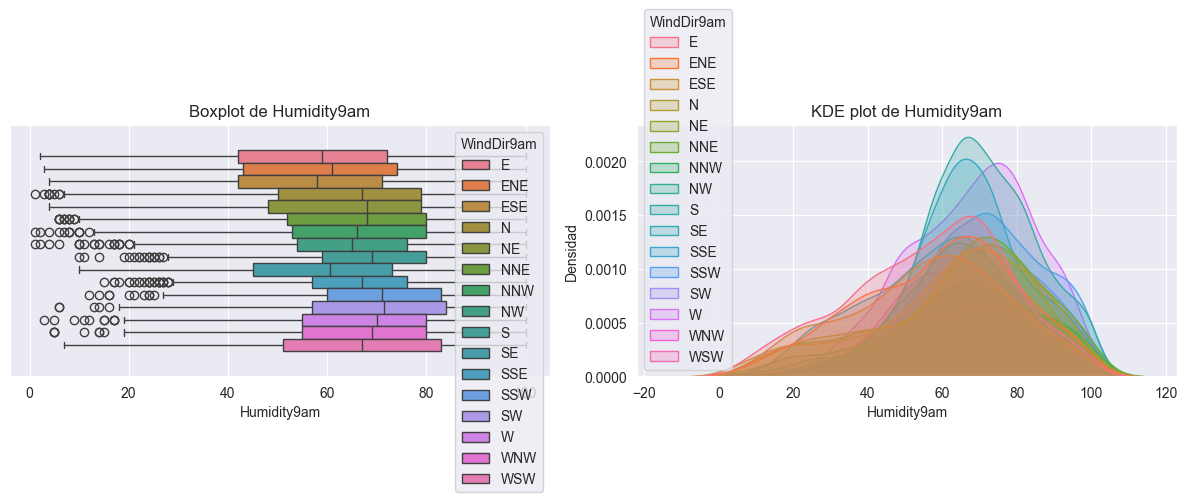

WindDir3pm


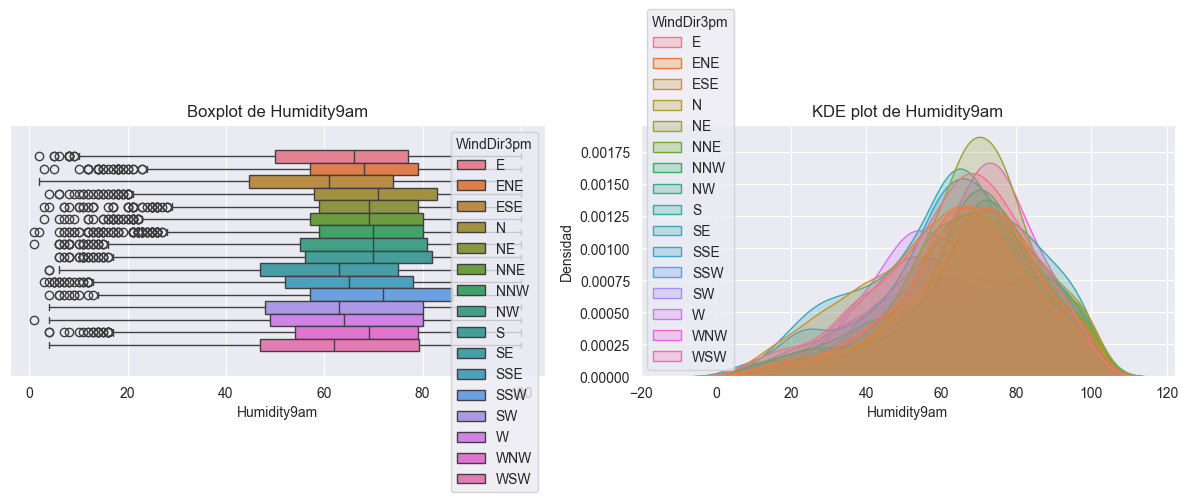

#############################################################################################
Humidity3pm
count    23133.000000
mean        47.986902
std         21.320710
min          1.000000
25%         32.000000
50%         48.000000
75%         63.000000
max        100.000000
Name: Humidity3pm, dtype: float64 

RainToday


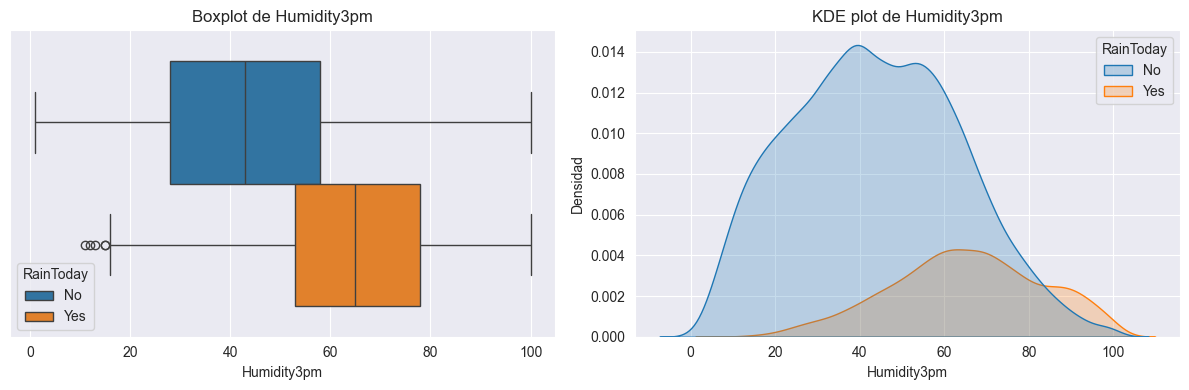

WindGustDir


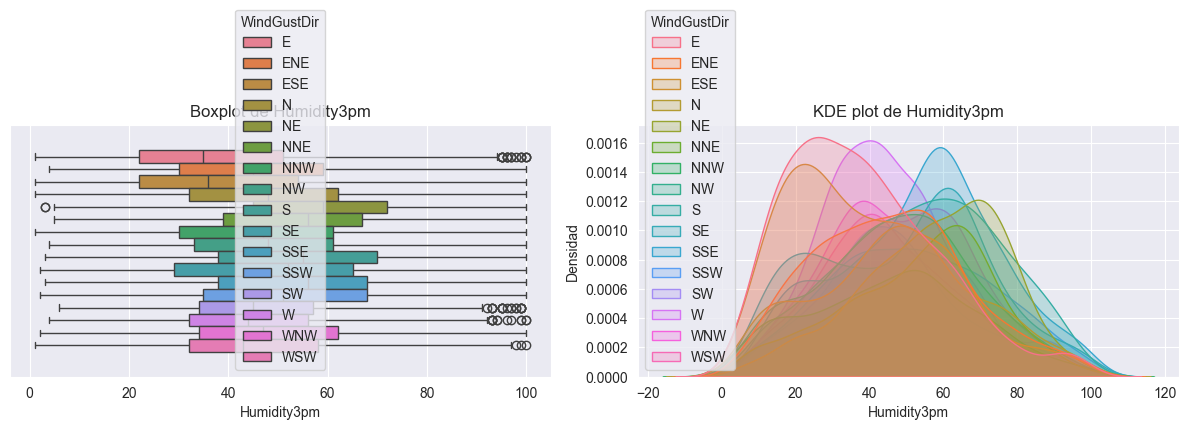

WindDir9am


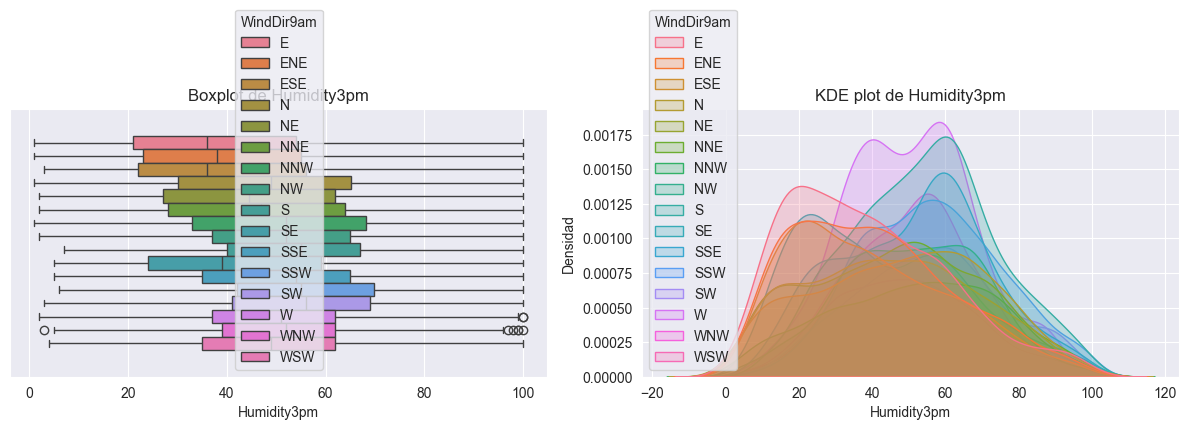

WindDir3pm


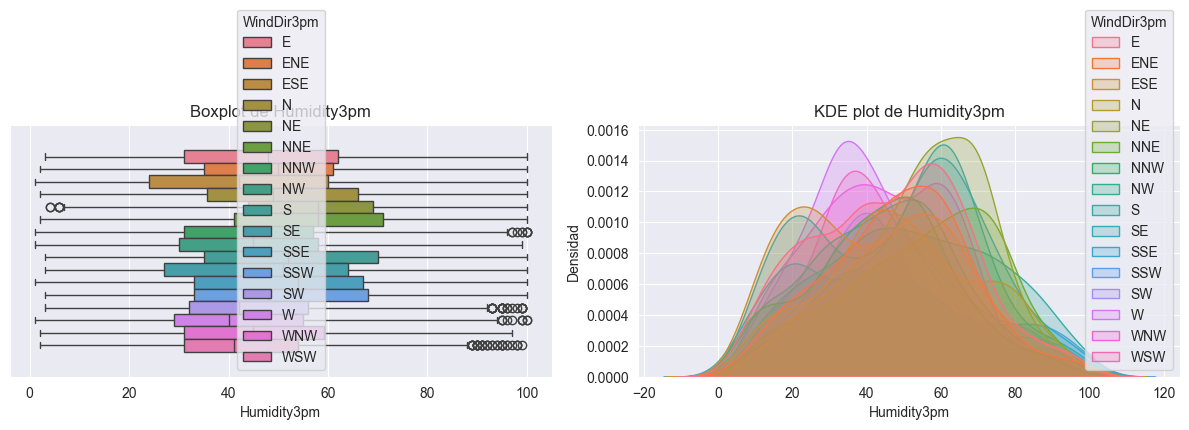

#############################################################################################
Pressure9am
count    23147.000000
mean      1017.403711
std          6.859966
min        986.700000
25%       1012.600000
50%       1017.100000
75%       1022.100000
max       1040.600000
Name: Pressure9am, dtype: float64 

RainToday


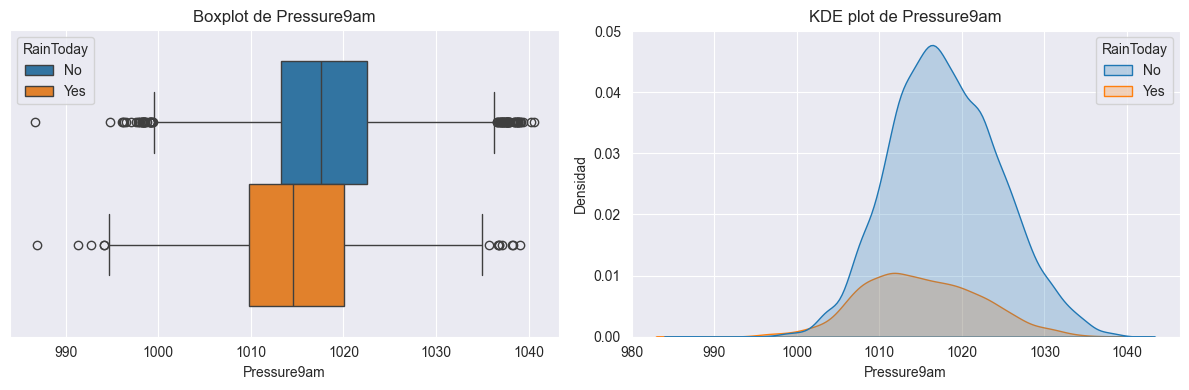

WindGustDir


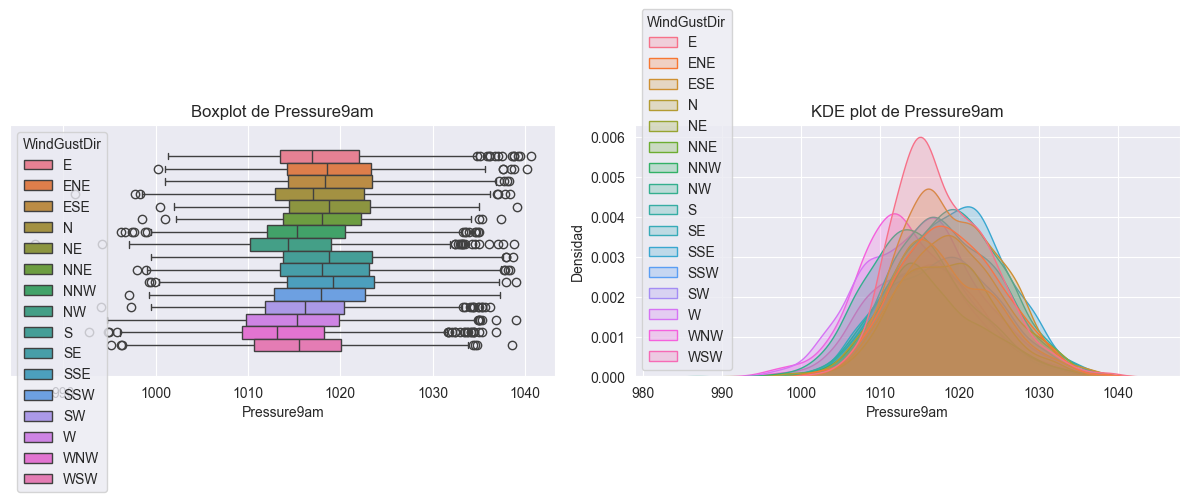

WindDir9am


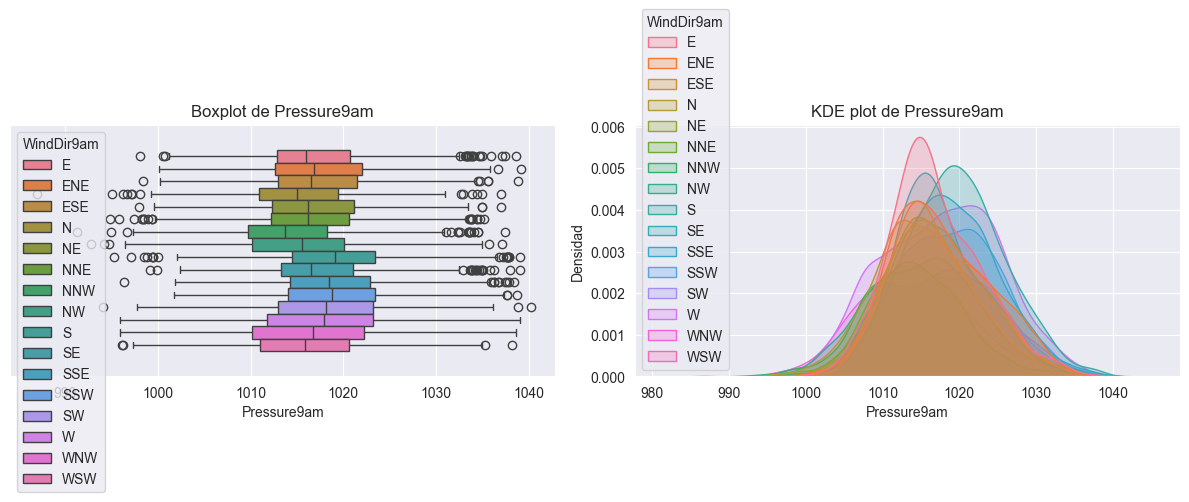

WindDir3pm


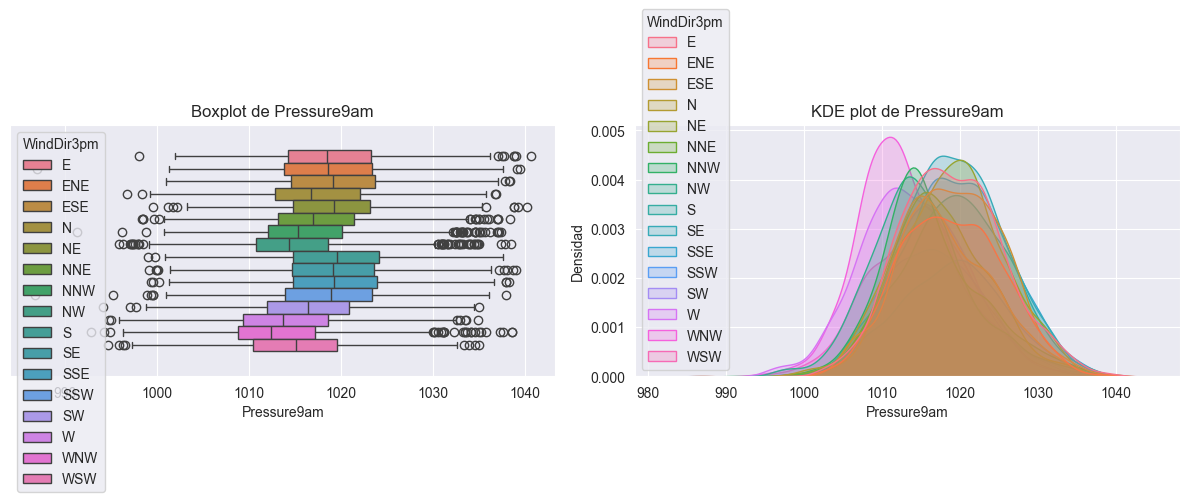

#############################################################################################
Pressure3pm
count    23157.000000
mean      1014.621531
std          6.844221
min        982.600000
25%       1009.600000
50%       1014.400000
75%       1019.400000
max       1037.800000
Name: Pressure3pm, dtype: float64 

RainToday


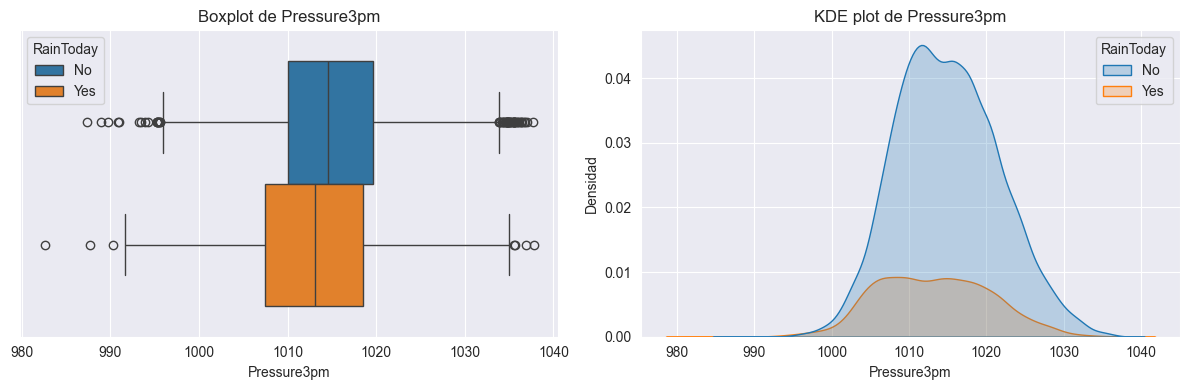

WindGustDir


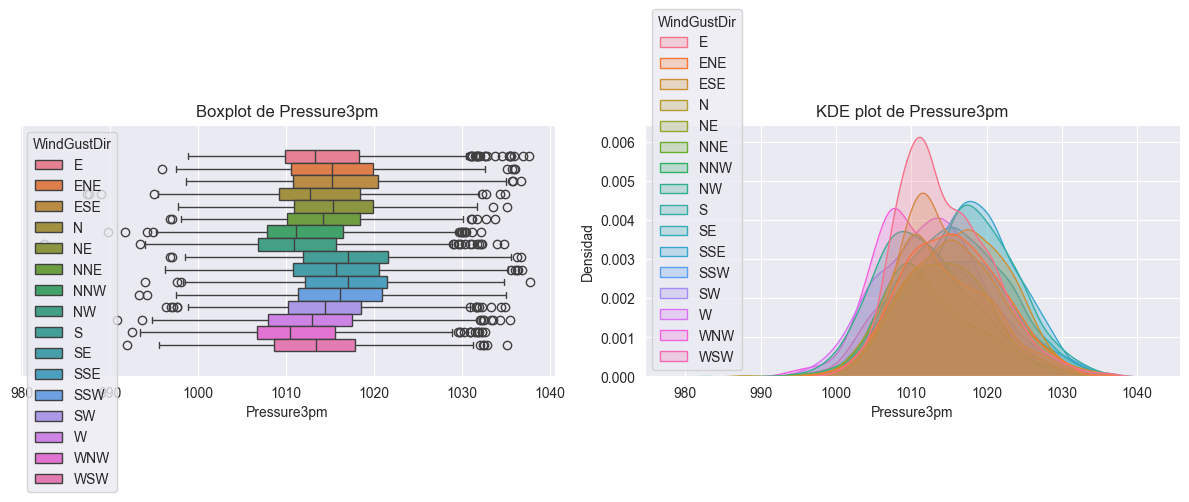

WindDir9am


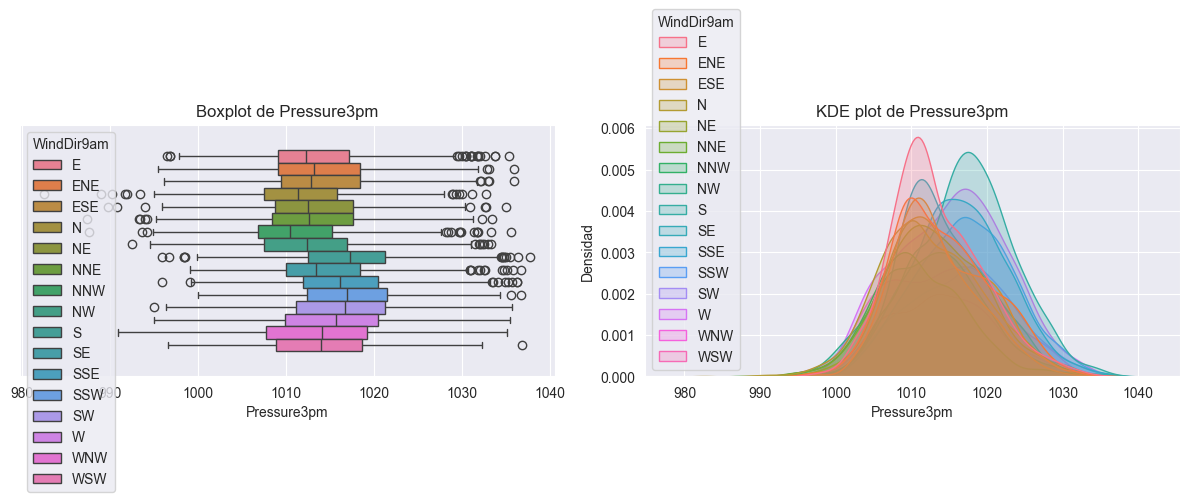

WindDir3pm


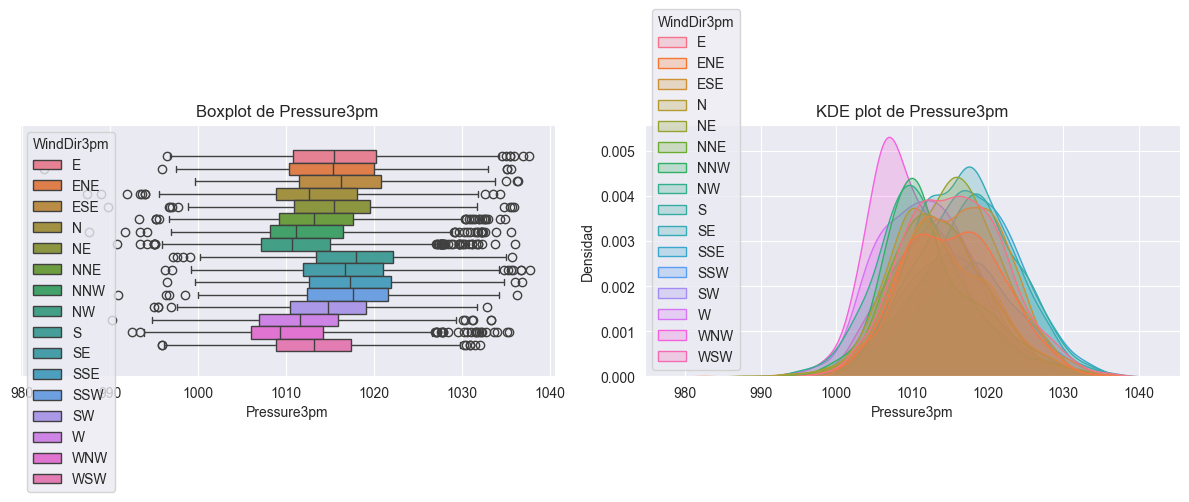

#############################################################################################
Cloud9am
count    13214.000000
mean         3.935523
std          2.930475
min          0.000000
25%          1.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64 

RainToday


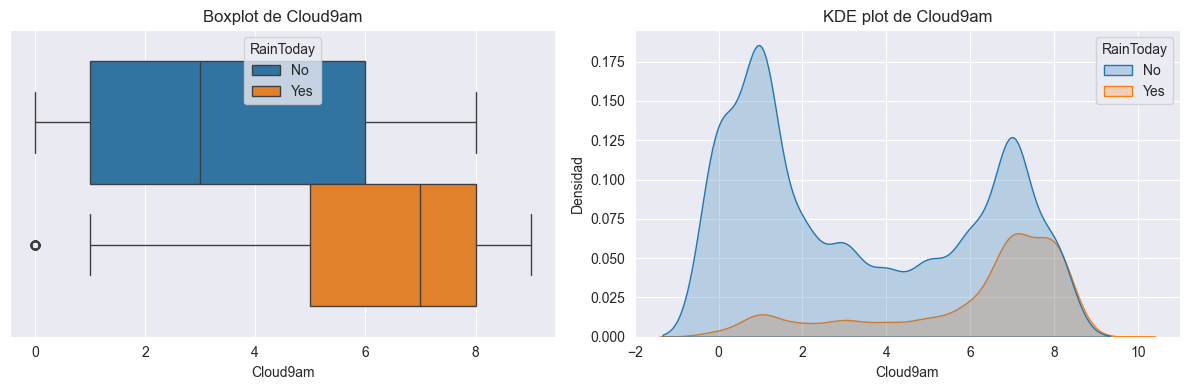

WindGustDir


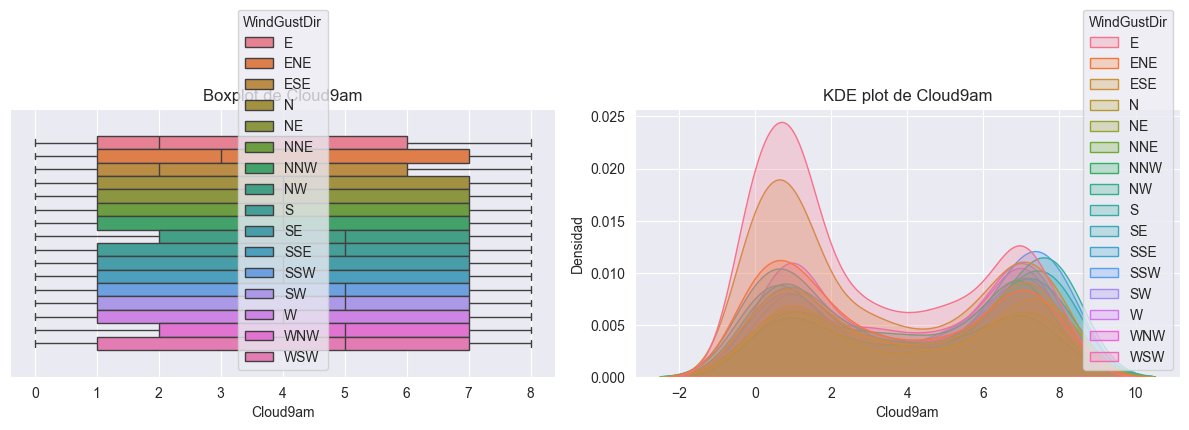

WindDir9am


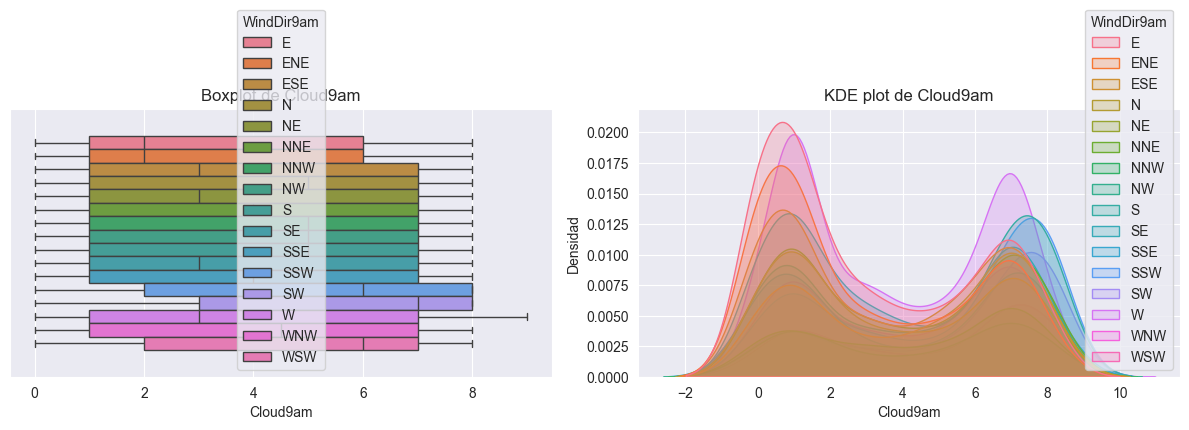

WindDir3pm


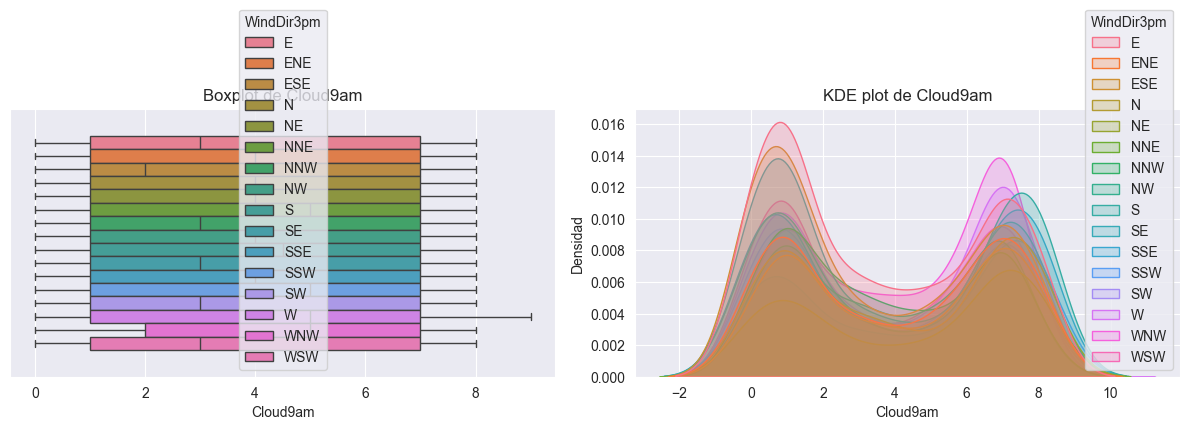

#############################################################################################
Cloud3pm
count    13175.000000
mean         4.073548
std          2.797038
min          0.000000
25%          1.000000
50%          4.000000
75%          7.000000
max          8.000000
Name: Cloud3pm, dtype: float64 

RainToday


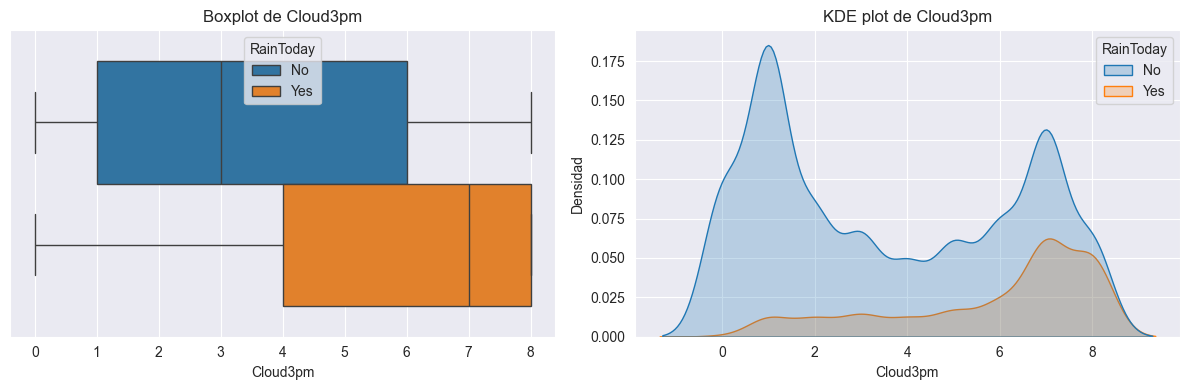

WindGustDir


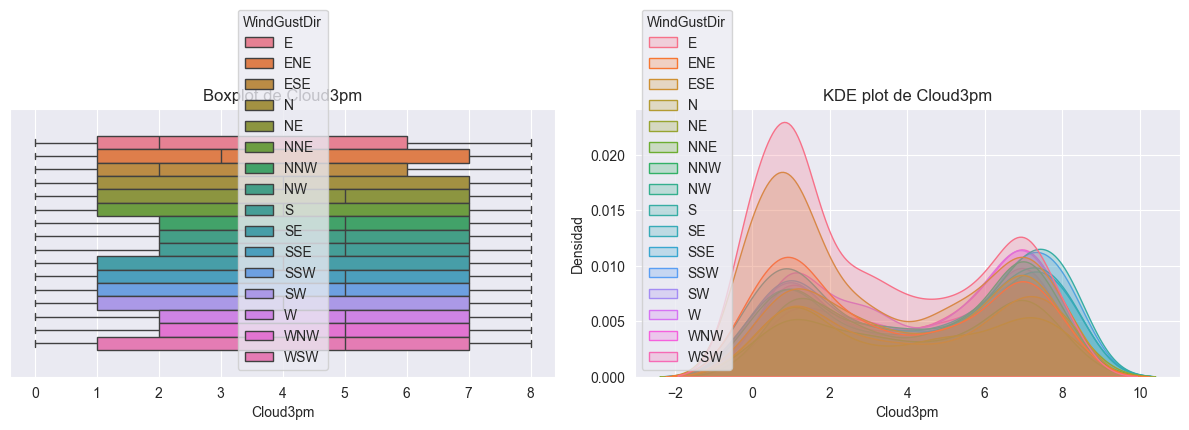

WindDir9am


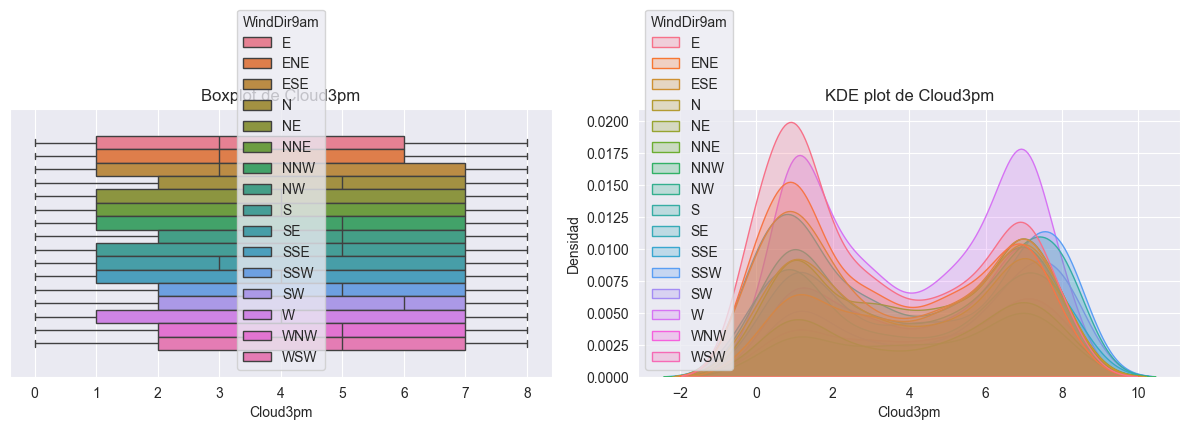

WindDir3pm


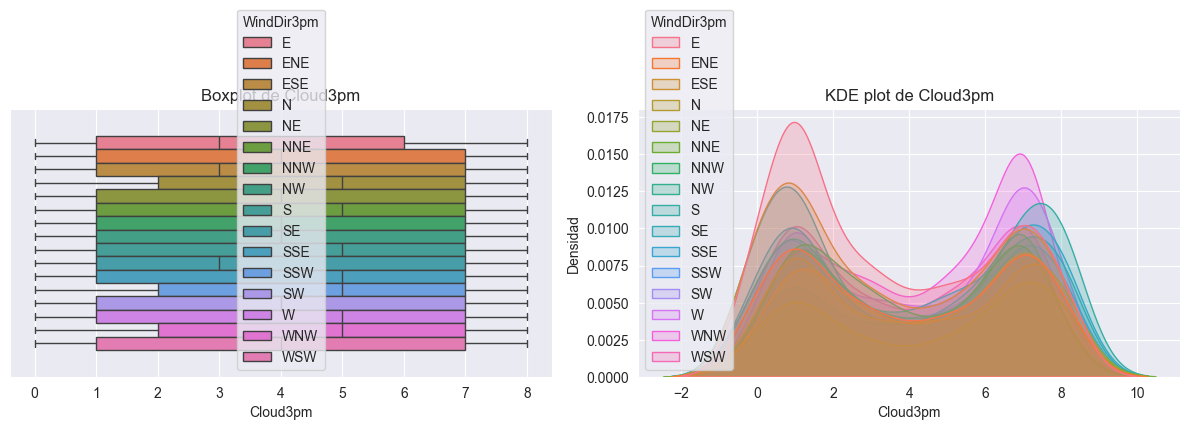

#############################################################################################
Temp9am
count    23184.000000
mean        18.696092
std          6.742933
min         -3.100000
25%         13.800000
50%         18.700000
75%         23.700000
max         39.100000
Name: Temp9am, dtype: float64 

RainToday


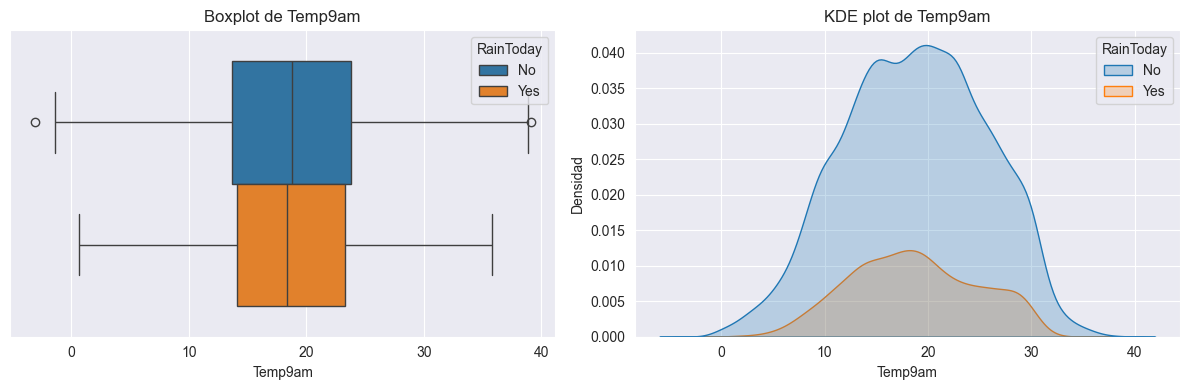

WindGustDir


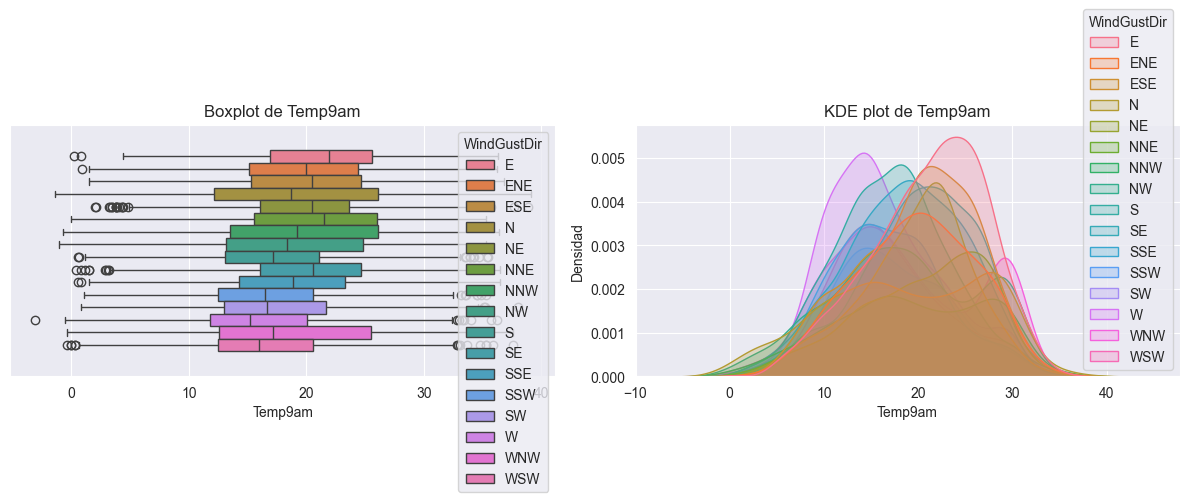

WindDir9am


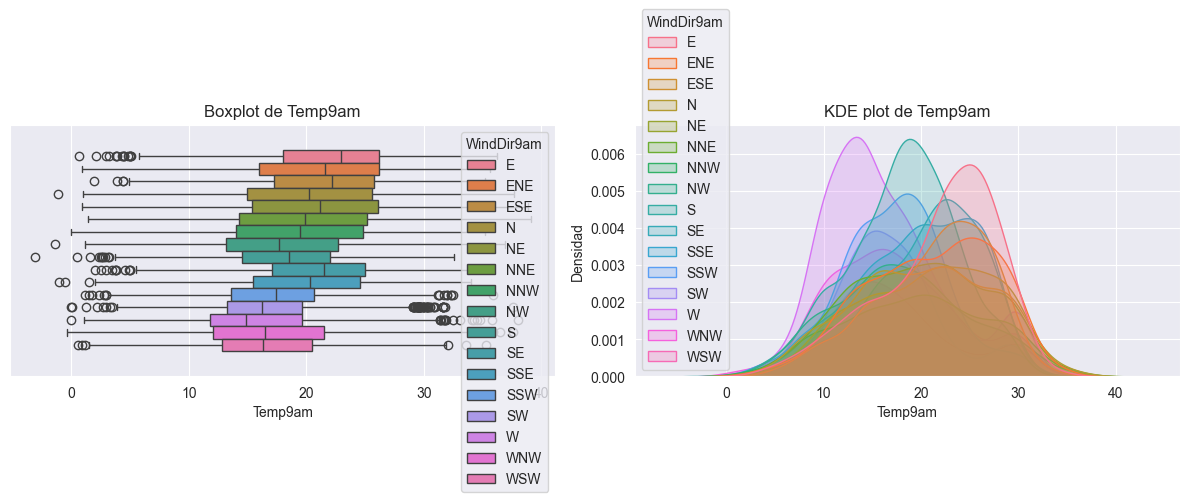

WindDir3pm


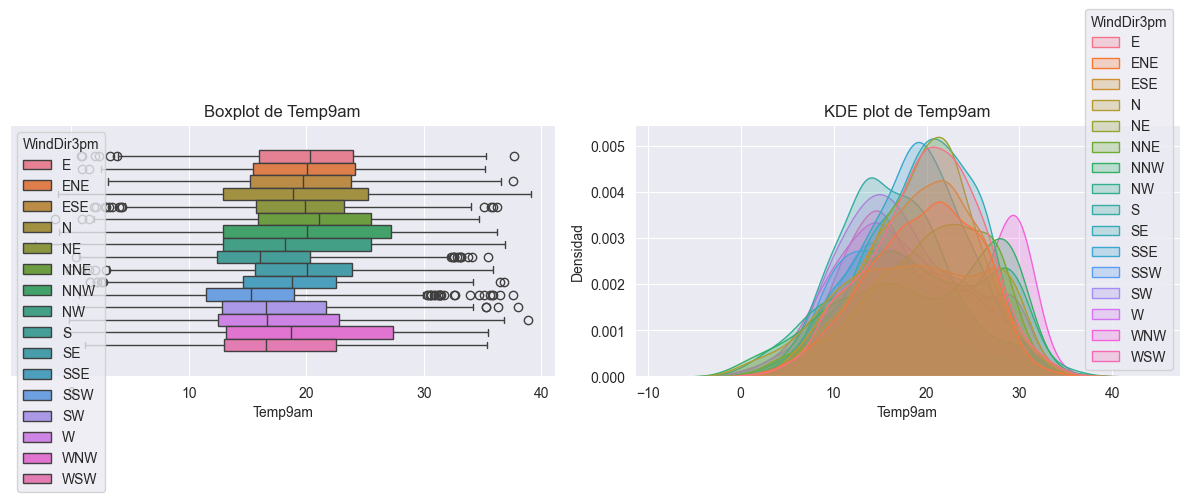

#############################################################################################
Temp3pm
count    23168.000000
mean        23.691342
std          6.605523
min          3.400000
25%         18.700000
50%         23.200000
75%         28.600000
max         46.100000
Name: Temp3pm, dtype: float64 

RainToday


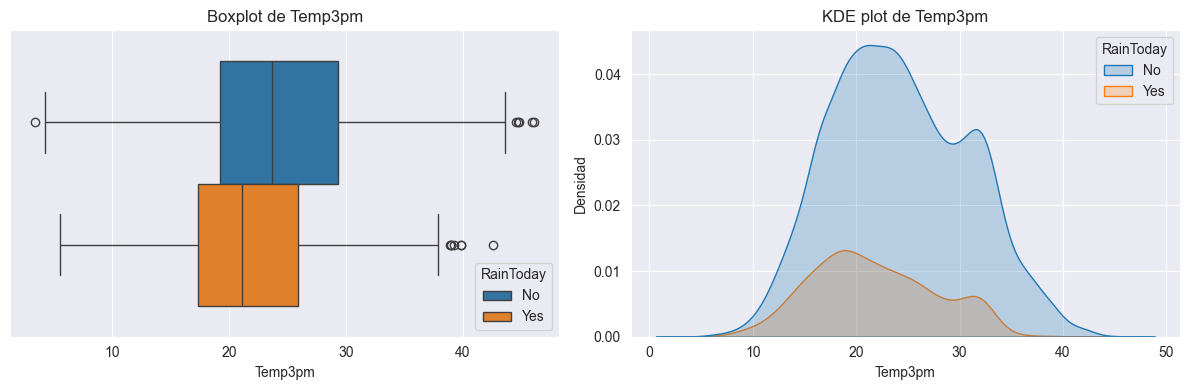

WindGustDir


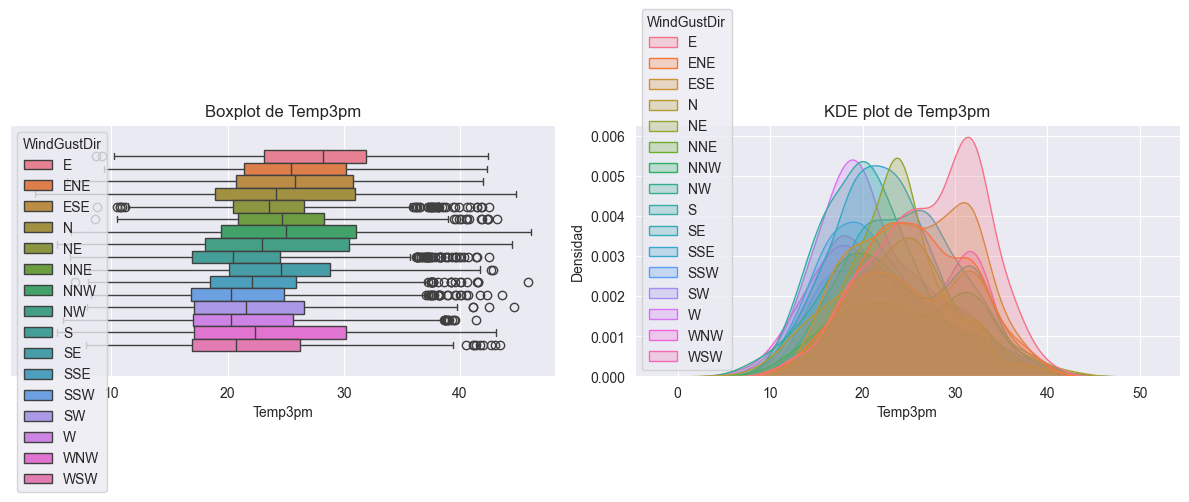

WindDir9am


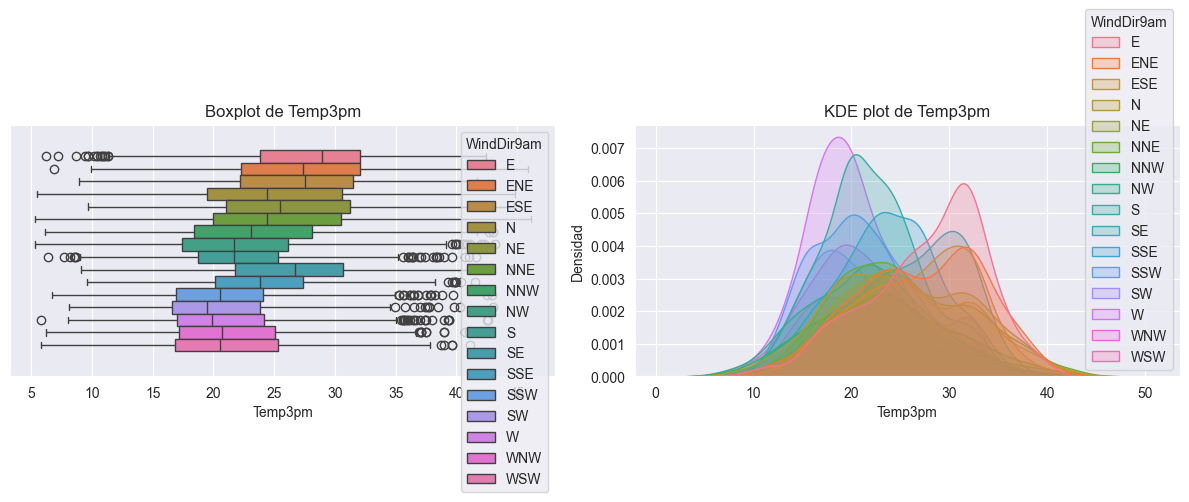

WindDir3pm


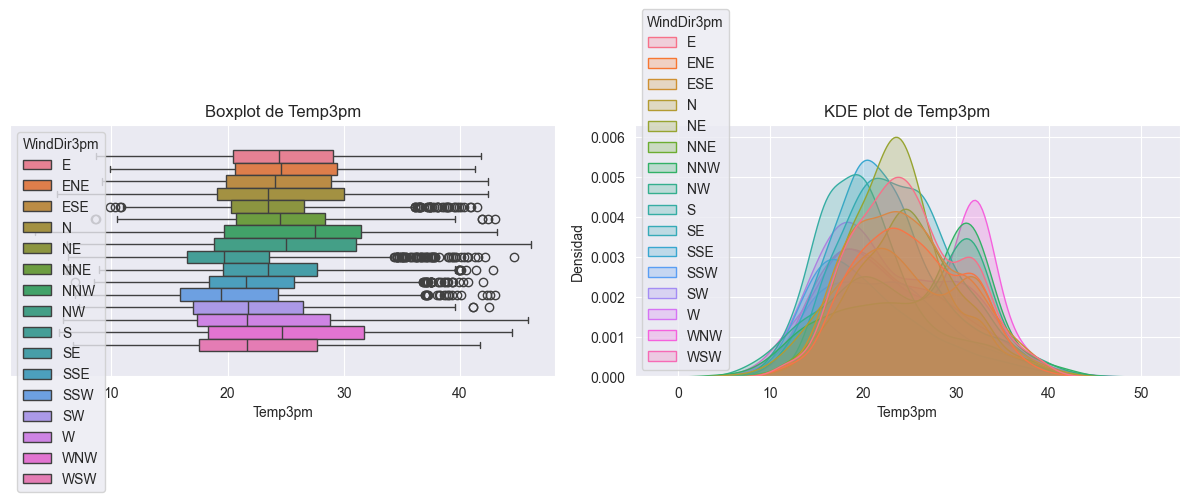

#############################################################################################
#############################################################################################
count     23095
unique        2
top          No
freq      18516
Name: RainToday, dtype: object 



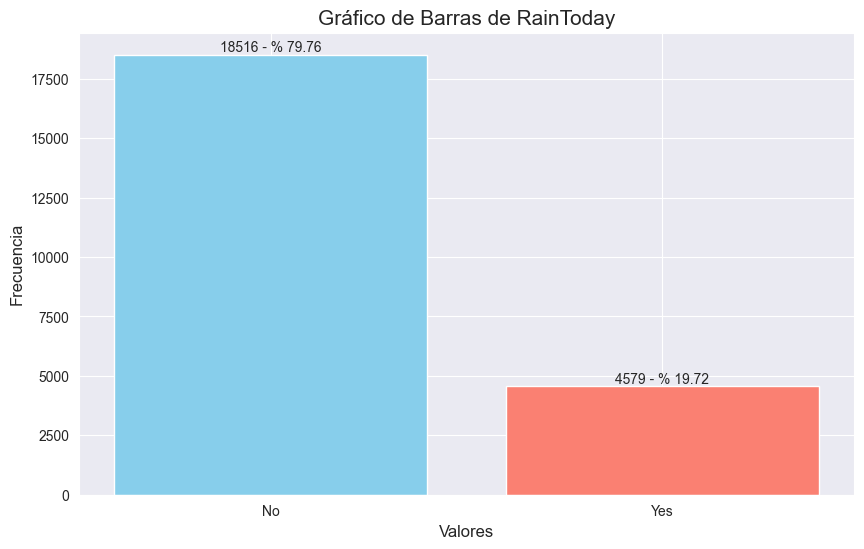

count     22168
unique       16
top           E
freq       1881
Name: WindGustDir, dtype: object 



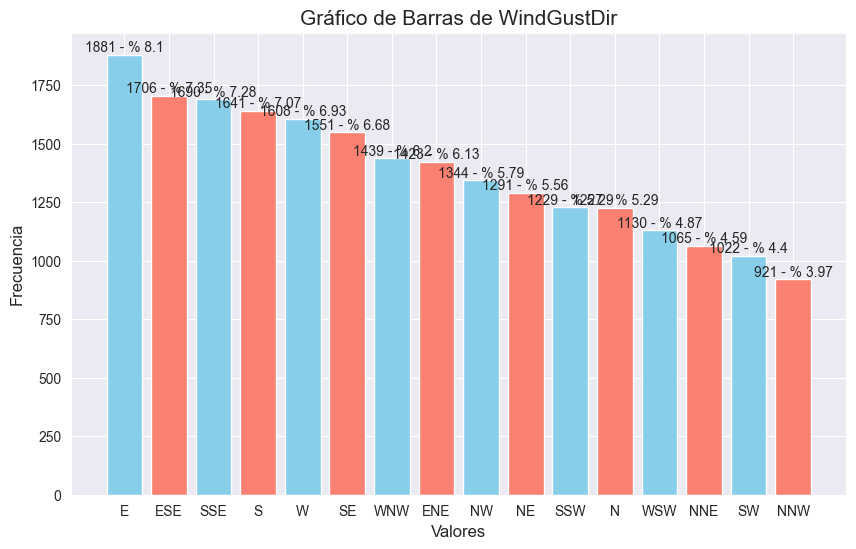

count     21560
unique       16
top           W
freq       1879
Name: WindDir9am, dtype: object 



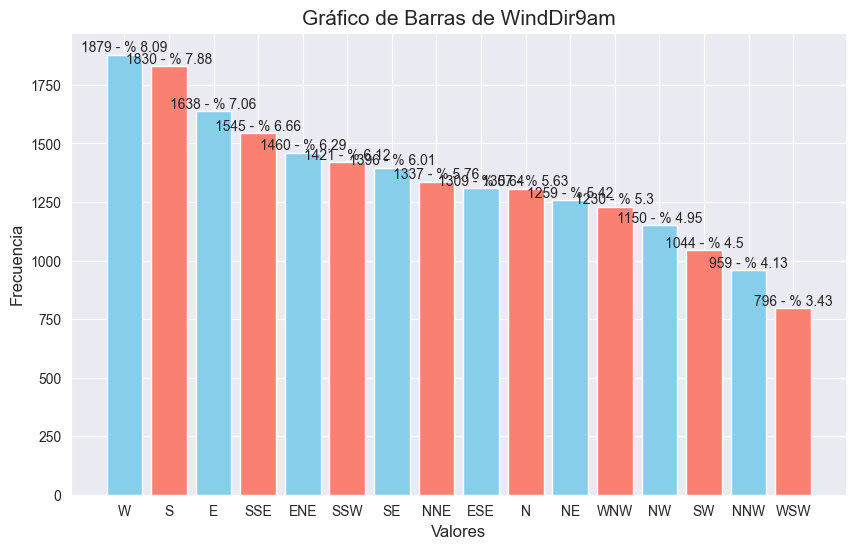

count     23013
unique       16
top          SE
freq       1789
Name: WindDir3pm, dtype: object 



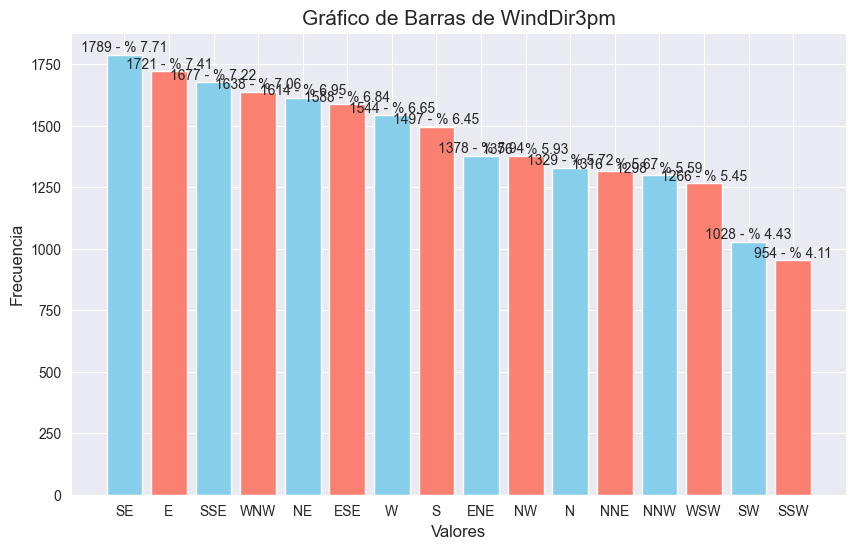

In [222]:
sns.set_style("darkgrid")
x_train_grafico=pd.DataFrame(x_train,columns=x_train.drop(columns=['Date', 'Location']).columns)

for columna in x_train_grafico:
    if not columna in ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
        print(columna)
        print(x_train[columna].describe(), '\n')

        for i in ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
            print(i)
            fig, axs = plt.subplots(1, 2, figsize=(12, 4))

            sns.boxplot(data=x_train, x=columna, hue=f'{i}', ax=axs[0])
            axs[0].set_title(f'Boxplot de {columna}')

            sns.kdeplot(data=x_train, x=columna, fill=True, hue=f'{i}', ax=axs[1])
            axs[1].set_title(f'KDE plot de {columna}')
            axs[1].set_ylabel('Densidad')

            plt.tight_layout()
            plt.show()
    print('#############################################################################################')

for i in ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
    print(x_train[f'{i}'].describe(), '\n')

    count = x_train[f'{i}'].value_counts().reset_index()
    count.columns = ['Valores', 'Frecuencia']

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    bars = plt.bar(count['Valores'].astype(str), count['Frecuencia'], color=['skyblue', 'salmon'])

    # Agregar título y etiquetas
    plt.title(f'Gráfico de Barras de {i}', fontsize=15)
    plt.xlabel('Valores', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Agregar el número encima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text((bar.get_x() + bar.get_width() / 2.0), height, f'{int(height)} - % {round((int(height)/23215)*100,2)}', ha='center', va='bottom')

    # Mostrar el gráfico
    plt.show()


#### Paso 3 (Imputación de datos)

En base al análisis descriptivo, decidimos utilizar distintos métodos de imputación según la distribución y el tipo de variable.

- CRIM: Mediana
- ZN: Mediana

- INDUS: KNN
- CHAS: KNN
- NOX: Mediana
- RM: Media
- AGE: KNN
- DIS: Mediana
- RAD: KNN
- TAX: KNN
- PTRATIO: Mediana
- B: Mediana
- LSTAT: Media

In [ ]:
#Imputación mediante la mediana

imputer_median = SimpleImputer(strategy='median')
x_train_imputer= x_train.copy()
x_test_imputer = x_test.copy()

x_train_imputer[['CRIM', 'ZN', 'NOX', 'DIS', 'PTRATIO','B']]= imputer_median.fit_transform(x_train_imputer[['CRIM', 'ZN', 'NOX', 'DIS', 'PTRATIO','B']])
x_test_imputer[['CRIM', 'ZN', 'NOX', 'DIS', 'PTRATIO','B']]= imputer_median.transform(x_test_imputer[['CRIM', 'ZN', 'NOX', 'DIS', 'PTRATIO','B']])

x_train_imputer.isna().sum()

In [ ]:
#Imputación mediante la media en las columnas mencionadas anteriormente
imputer_mean = SimpleImputer(strategy='mean')
x_train_imputer[['RM', 'LSTAT']]= imputer_mean.fit_transform(x_train_imputer[['RM', 'LSTAT']])
x_test_imputer[['RM', 'LSTAT']]= imputer_mean.transform(x_test_imputer[['RM', 'LSTAT']])

x_train_imputer.isna().sum()

In [ ]:
#Imputación mediante KNN en las columnas mencionadas anteriormente
knn_imputer = KNNImputer()
x_train_imputer[['INDUS', 'CHAS','AGE', 'RAD', 'TAX']]= knn_imputer.fit_transform(x_train_imputer[['INDUS', 'CHAS','AGE', 'RAD', 'TAX']])
x_test_imputer[['INDUS', 'CHAS','AGE', 'RAD', 'TAX']]= knn_imputer.transform(x_test_imputer[['INDUS', 'CHAS','AGE', 'RAD', 'TAX']])

x_train_imputer.isna().sum()

In [ ]:
#Escalado de Datos
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputer)
x_test_scaled = scaler.transform(x_test_imputer)